In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import plotly.graph_objects as go
import os
%matplotlib inline

In [3]:
pd.set_option('max_columns',500)
life_expectancy = pd.read_csv('Life Expectancy Data.csv')
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
orig_cols = list(life_expectancy.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', ' '))
life_expectancy.columns = new_cols

In [6]:
life_expectancy.rename(columns={'thinness 1-19 years':'thinness 10-19 years'}, inplace=True)

In [7]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# 1. Data Cleansing

### Null Value

In [9]:
life_expectancy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 10-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
life_expectancy = life_expectancy.dropna(subset = ['Life expectancy'])

### Fill null value by mean of each year

In [11]:
imputed_data = []
for year in list(life_expectancy.Year.unique()):
    year_data = life_expectancy[life_expectancy.Year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
life_expectancy = pd.concat(imputed_data).copy()

In [12]:
life_expectancy.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 10-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [13]:
life_expectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.655640,740.321185,80.338718,2427.855874,38.235394,42.179303,82.534884,6.000580,82.302452,1.747712,7492.089256,1.276723e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,3.918349,1990.930605,22.628026,11485.970937,19.851535,160.700547,23.342384,2.401776,23.632472,5.085542,13179.663443,5.393803e+07,4.396660,4.484961,0.205503,3.258096
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,1.107500,4.853964,74.099237,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,2007.50000,72.100000,144.000000,3.000000,4.160000,65.611455,87.000000,17.000000,43.000000,4.000000,93.000000,5.905000,93.000000,0.100000,3112.560501,3.640009e+06,3.400000,3.400000,0.673000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.400000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7464.487887,1.181332e+07,7.100000,7.200000,0.773000,14.100000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Correlation

In [14]:
# life_expectancy.corr()

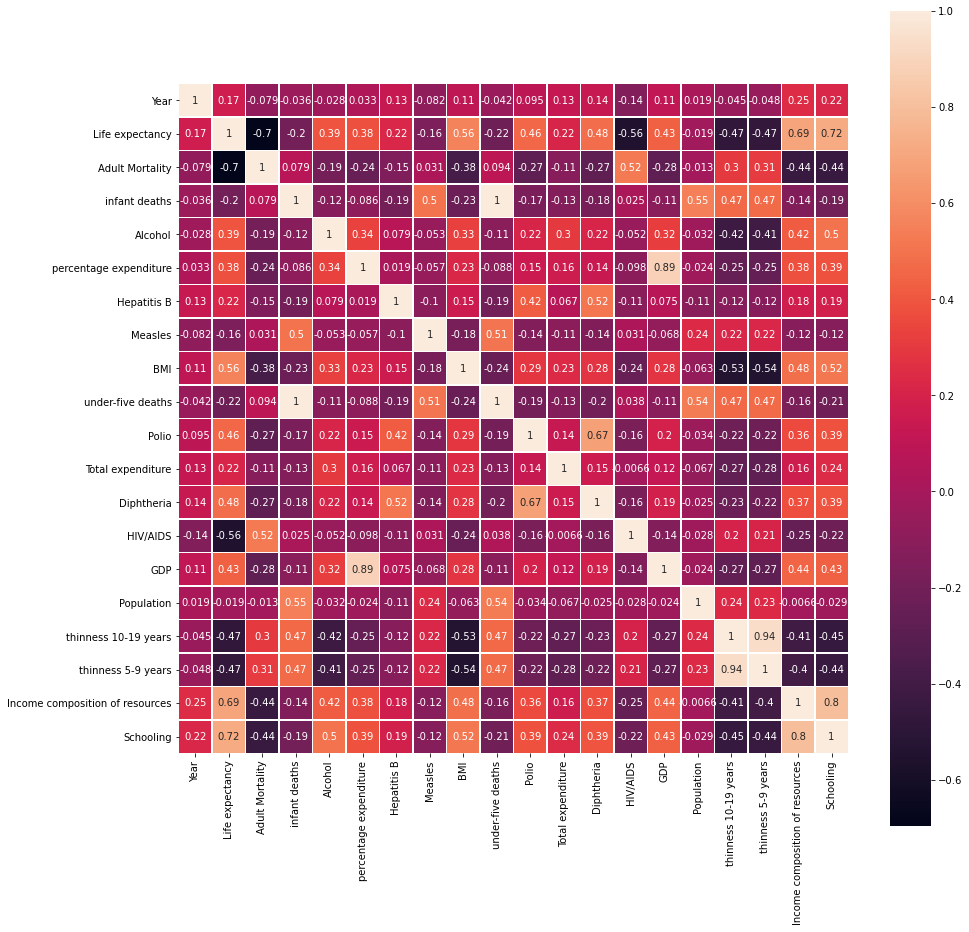

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(life_expectancy.corr(), square=True, annot=True, linewidths=.5)

Drop some variables which have high collinearity: 'infant deaths', 'percentage expenditure', thinness 10-19 years' and 'schooling'

In [16]:
life_expectancy = life_expectancy.drop(columns = ['infant deaths', 'percentage expenditure', 
                                                  'thinness 10-19 years', 'Schooling'])

In [17]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Alcohol                          2928 non-null   float64
 6   Hepatitis B                      2928 non-null   float64
 7   Measles                          2928 non-null   int64  
 8   BMI                              2928 non-null   float64
 9   under-five deaths                2928 non-null   int64  
 10  Polio                            2928 non-null   float64
 11  Total expenditure                2928 non-null   float64
 12  Diphtheria          

In [18]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths',
       'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Population', 'thinness 5-9 years', 'Income composition of resources'],
      dtype='object')

-------------

## Detecting Outliers for each variable.



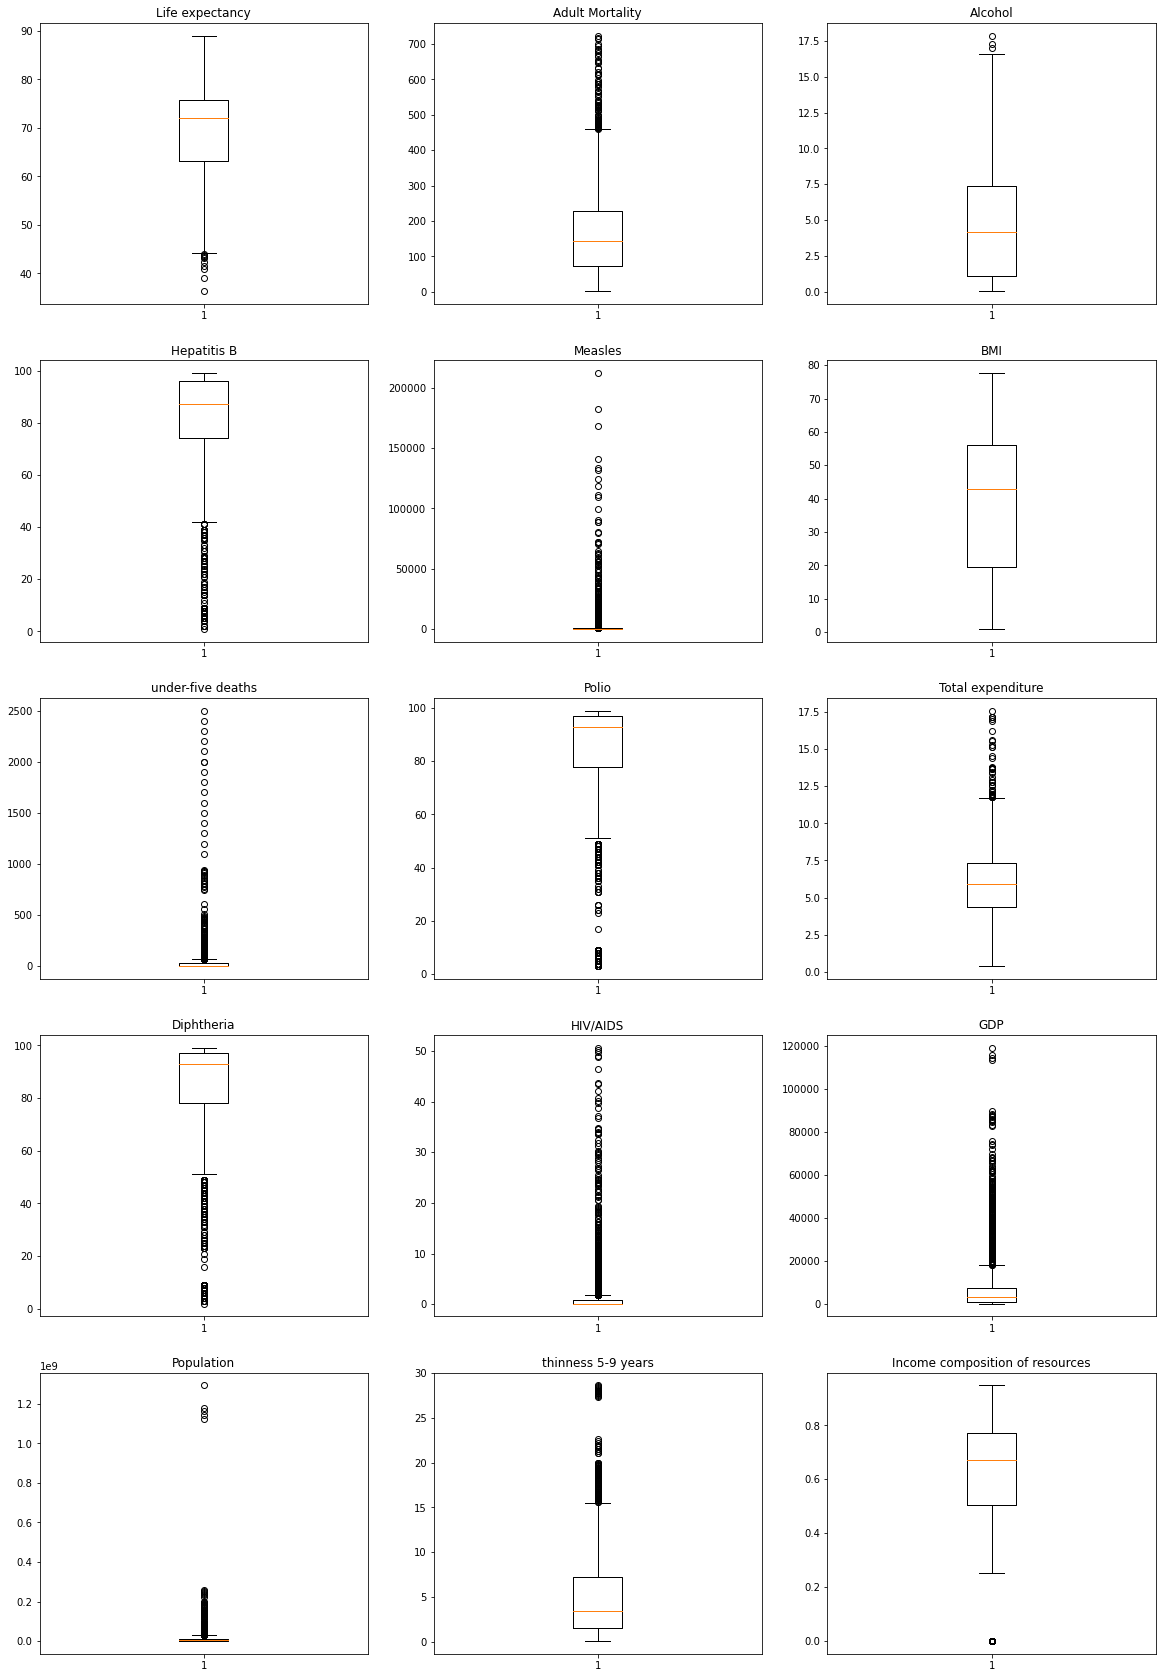

In [19]:
col_dict = {'Life expectancy':1,'Adult Mortality':2,'Alcohol':3,
            'Hepatitis B':4,'Measles':5,'BMI':6,'under-five deaths':7,'Polio':8,'Total expenditure':9,
            'Diphtheria':10,'HIV/AIDS':11,'GDP':12,'Population':13,'thinness 5-9 years':14,
            'Income composition of resources':15}

# # Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,3,i)
                     plt.boxplot(life_expectancy[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [20]:
col_dict

{'Life expectancy': 1,
 'Adult Mortality': 2,
 'Alcohol': 3,
 'Hepatitis B': 4,
 'Measles': 5,
 'BMI': 6,
 'under-five deaths': 7,
 'Polio': 8,
 'Total expenditure': 9,
 'Diphtheria': 10,
 'HIV/AIDS': 11,
 'GDP': 12,
 'Population': 13,
 'thinness 5-9 years': 14,
 'Income composition of resources': 15}

In [21]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(life_expectancy[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((life_expectancy[variable] > max_val) | 
                                                                                           (life_expectancy[variable] < min_val))[0])),len((np.where((life_expectancy[variable] > max_val) | 
                                                                                           (life_expectancy[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life expectancy : 10 and 0.5032712632108707
Number of outliers and percentage of it in Adult Mortality : 82 and 4.12682435832914
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in Hepatitis B : 220 and 11.071967790639155
Number of outliers and percentage of it in Measles : 542 and 27.27730246602919
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in under-five deaths : 394 and 19.828887770508302
Number of outliers and percentage of it in Polio : 278 and 13.990941117262205
Number of outliers and percentage of it in Total expenditure : 49 and 2.4660291897332662
Number of outliers and percentage of it in Diphtheria : 297 and 14.947156517362858
Number of outliers and percentage of it in HIV/AIDS : 542 and 27.27730246602919
Number of outliers and percentage of it in GDP : 300 and 15.09813789632612
Number of outliers and percentage

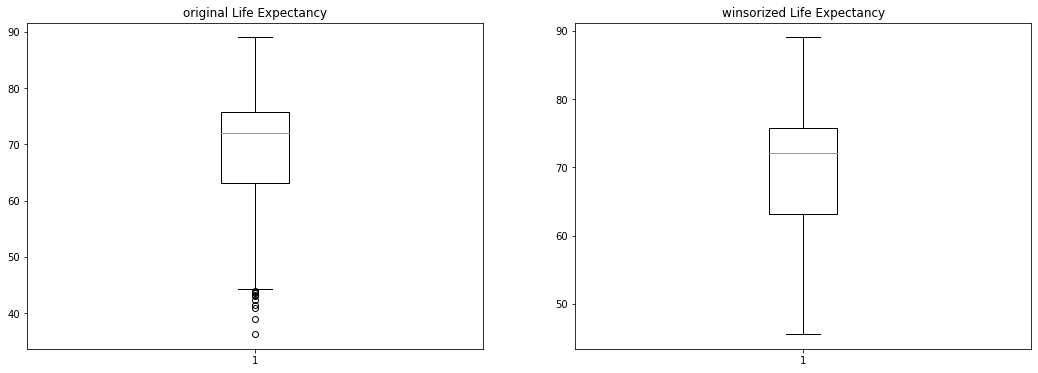

In [40]:
# Winsorize Life_Expectancy
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = life_expectancy['Life expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original Life Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(life_expectancy['Life expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized Life Expectancy")

plt.show()


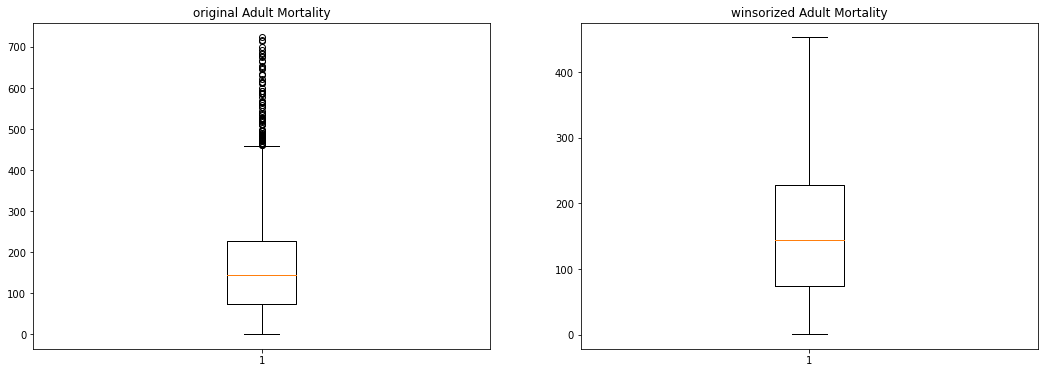

In [41]:
# Winsorize Adult Mortality
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = life_expectancy['Adult Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original Adult Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(life_expectancy['Adult Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized Adult Mortality")

plt.show()

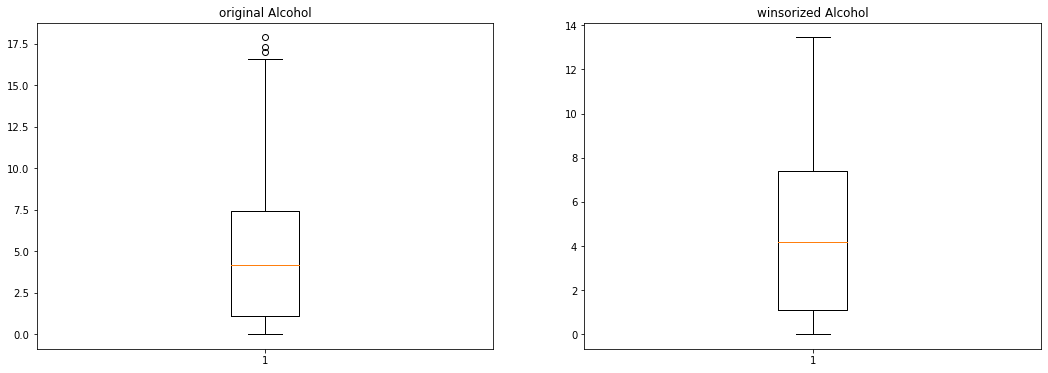

In [42]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = life_expectancy['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(life_expectancy['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized Alcohol")

plt.show()

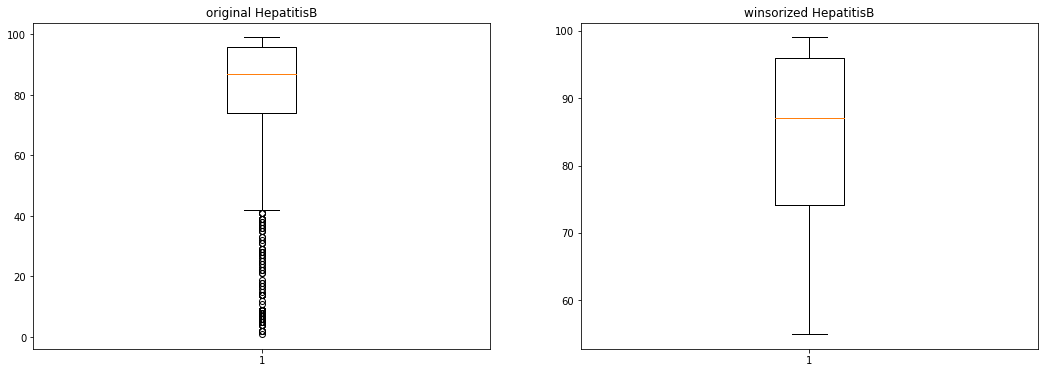

In [43]:
# Winsorize HepatitisB
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = life_expectancy['Hepatitis B']
plt.boxplot(original_HepatitisB)
plt.title("original HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(life_expectancy['Hepatitis B'],(0.1,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized HepatitisB")

plt.show()

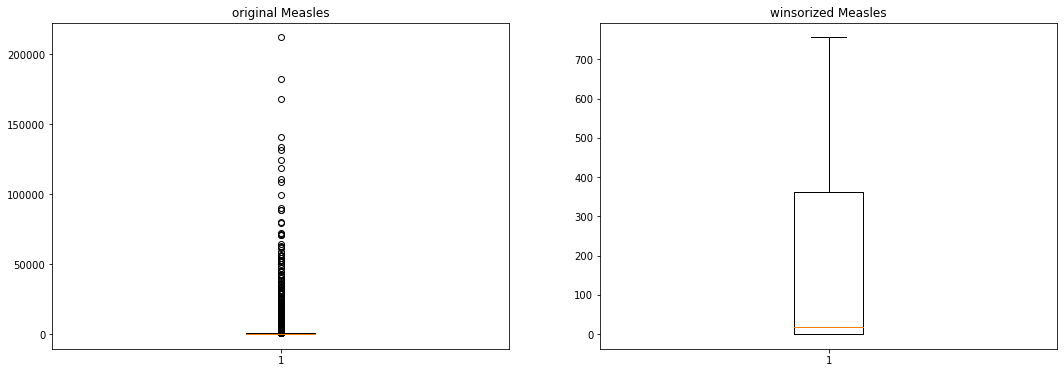

In [44]:
# Winsorize Measles
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = life_expectancy['Measles']
plt.boxplot(original_Measles)
plt.title("original Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(life_expectancy['Measles'],(0,0.2))
plt.boxplot(winsorized_Measles)
plt.title("winsorized Measles")

plt.show()

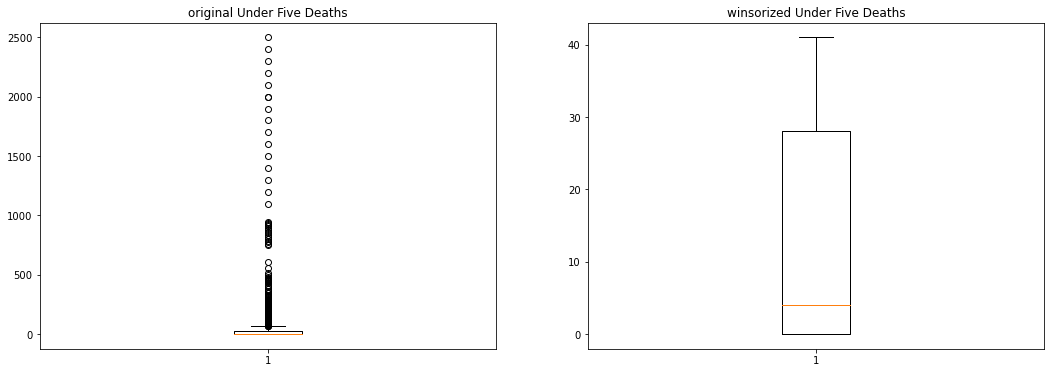

In [45]:
# Winsorize Under_Five_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = life_expectancy['under-five deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original Under Five Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(life_expectancy['under-five deaths'],(0,0.2))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized Under Five Deaths")

plt.show()

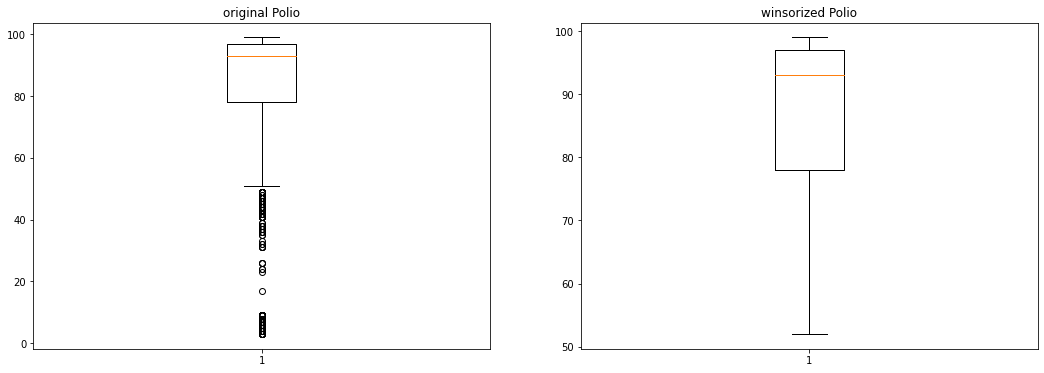

In [46]:
# Winsorize Polio
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = life_expectancy['Polio']
plt.boxplot(original_Polio)
plt.title("original Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(life_expectancy['Polio'],(0.1,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized Polio")

plt.show()

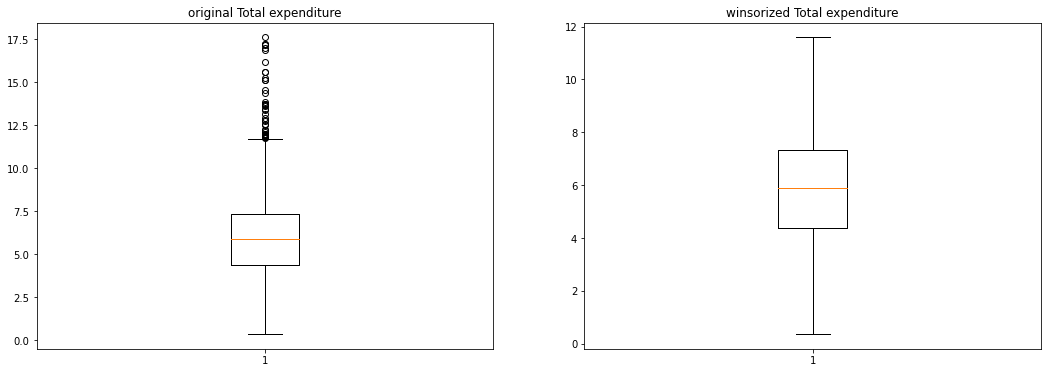

In [47]:
# Winsorize Tot_Exp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = life_expectancy['Total expenditure']
plt.boxplot(original_Tot_Exp)
plt.title("original Total expenditure")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(life_expectancy['Total expenditure'],(0,0.02))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized Total expenditure")

plt.show()

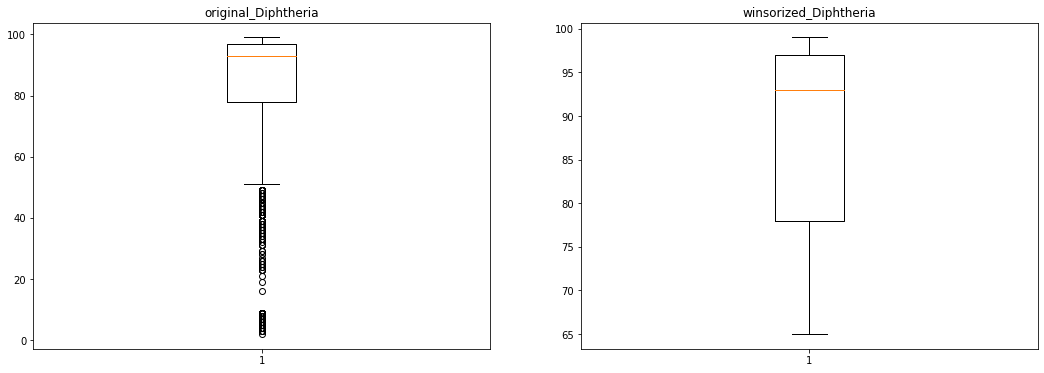

In [48]:
# Winsorize Diphtheria
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = life_expectancy['Diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(life_expectancy['Diphtheria'],(0.15,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

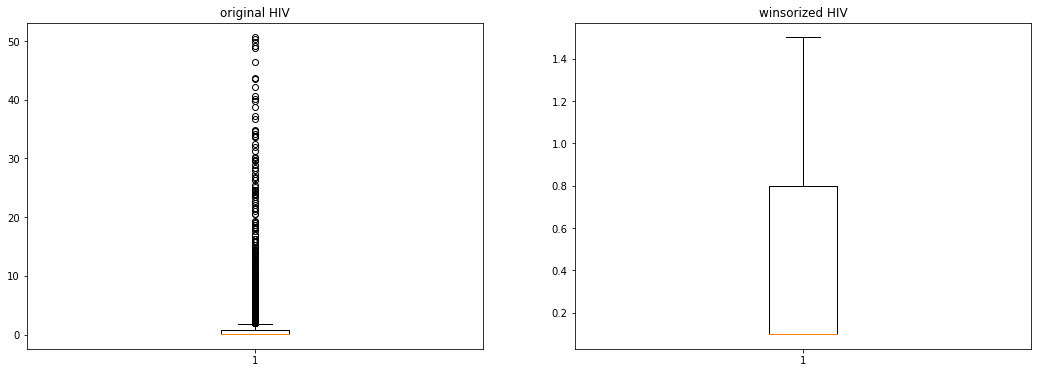

In [49]:
# Winsorize HIV/AIDS
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = life_expectancy['HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(life_expectancy['HIV/AIDS'],(0,0.2))
plt.boxplot(winsorized_HIV)
plt.title("winsorized HIV")

plt.show()


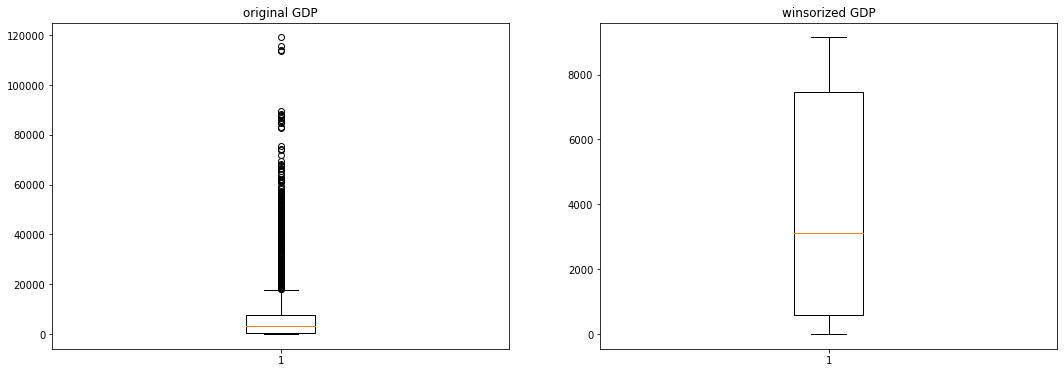

In [50]:
# Winsorize GDP
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = life_expectancy['GDP']
plt.boxplot(original_GDP)
plt.title("original GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(life_expectancy['GDP'],(0,0.2))
plt.boxplot(winsorized_GDP)
plt.title("winsorized GDP")

plt.show()

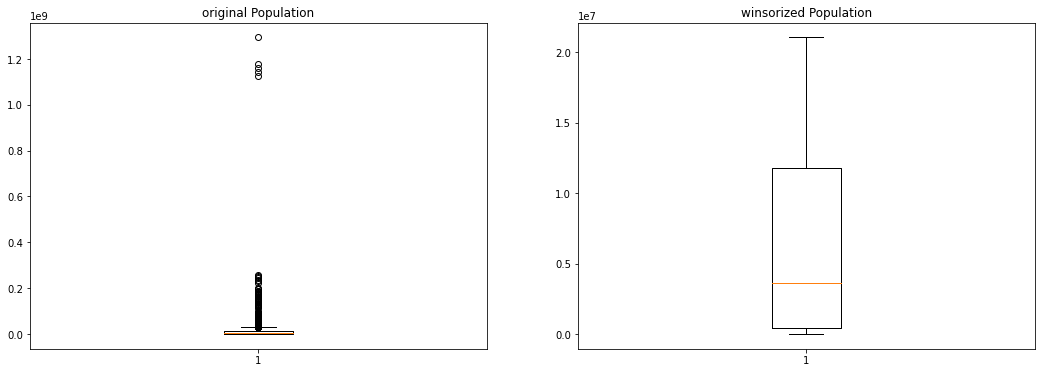

In [51]:
# Winsorize Population
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = life_expectancy['Population']
plt.boxplot(original_Population)
plt.title("original Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(life_expectancy['Population'],(0,0.1))
plt.boxplot(winsorized_Population)
plt.title("winsorized Population")

plt.show()

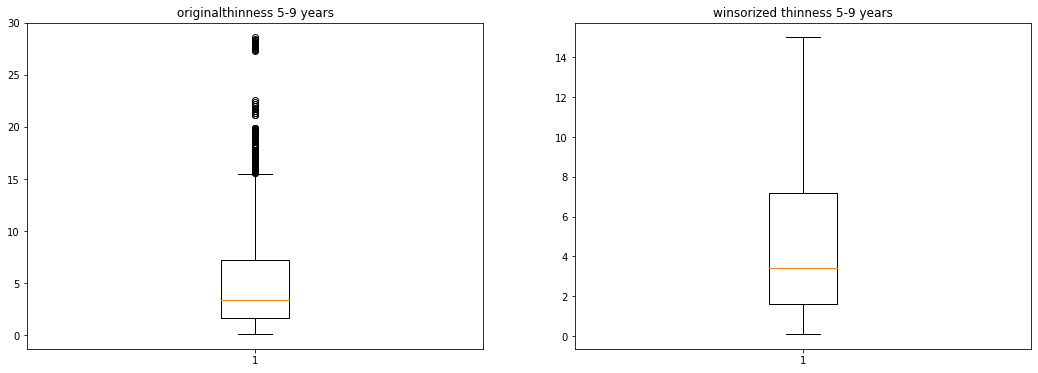

In [52]:
# Winsorize thinness_5to9_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = life_expectancy['thinness 5-9 years']
plt.boxplot(original_thinness_5to9_years)
plt.title("originalthinness 5-9 years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(life_expectancy['thinness 5-9 years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized thinness 5-9 years")

plt.show()

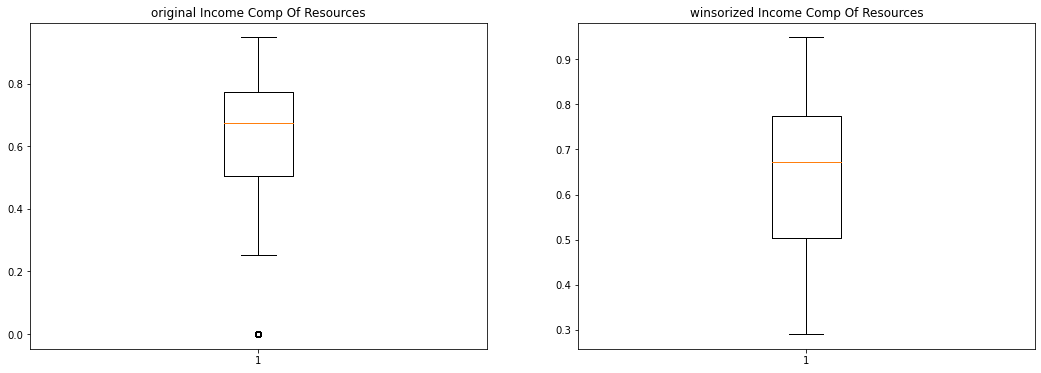

In [53]:
# Winsorize Income_Comp_Of_Resources
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = life_expectancy['Income composition of resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original Income Comp Of Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(life_expectancy['Income composition of resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized Income Comp Of Resources")

plt.show()

In [54]:
# # Check number of Outliers after Winsorization for each variable.
# win_list = [winsorized_Life_Expectancy, winsorized_Adult_Mortality, winsorized_Alcohol, winsorized_HepatitisB,
#             winsorized_Measles, winsorized_Under_Five_Deaths, winsorized_Polio, winsorized_Tot_Exp,
#             winsorized_Diphtheria, winsorized_HIV, winsorized_GDP, winsorized_Population, winsorized_thinness_5to9_years,
#             winsorized_Income_Comp_Of_Resources]
# for variable in win_list:
#     q75, q25 = np.percentile(variable, [75 ,25])
#     iqr = q75 - q25

#     min_val = q25 - (iqr*1.5)
#     max_val = q75 + (iqr*1.5)
    
#     print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))
    

In [55]:
# Adding winsorized variables to the data frame.
life_expectancy['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
life_expectancy['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
life_expectancy['winsorized_Alcohol'] = winsorized_Alcohol
life_expectancy['winsorized_HepatitisB'] = winsorized_HepatitisB
life_expectancy['winsorized_Measles'] = winsorized_Measles
life_expectancy['winsorized_BMI'] = life_expectancy['BMI']
life_expectancy['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
life_expectancy['winsorized_Polio'] = winsorized_Polio
life_expectancy['winsorized_Tot_Exp'] = winsorized_Tot_Exp
life_expectancy['winsorized_Diphtheria'] = winsorized_Diphtheria
life_expectancy['winsorized_HIV'] = winsorized_HIV
life_expectancy['winsorized_GDP'] = winsorized_GDP
life_expectancy['winsorized_Population'] = winsorized_Population
life_expectancy['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
life_expectancy['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources

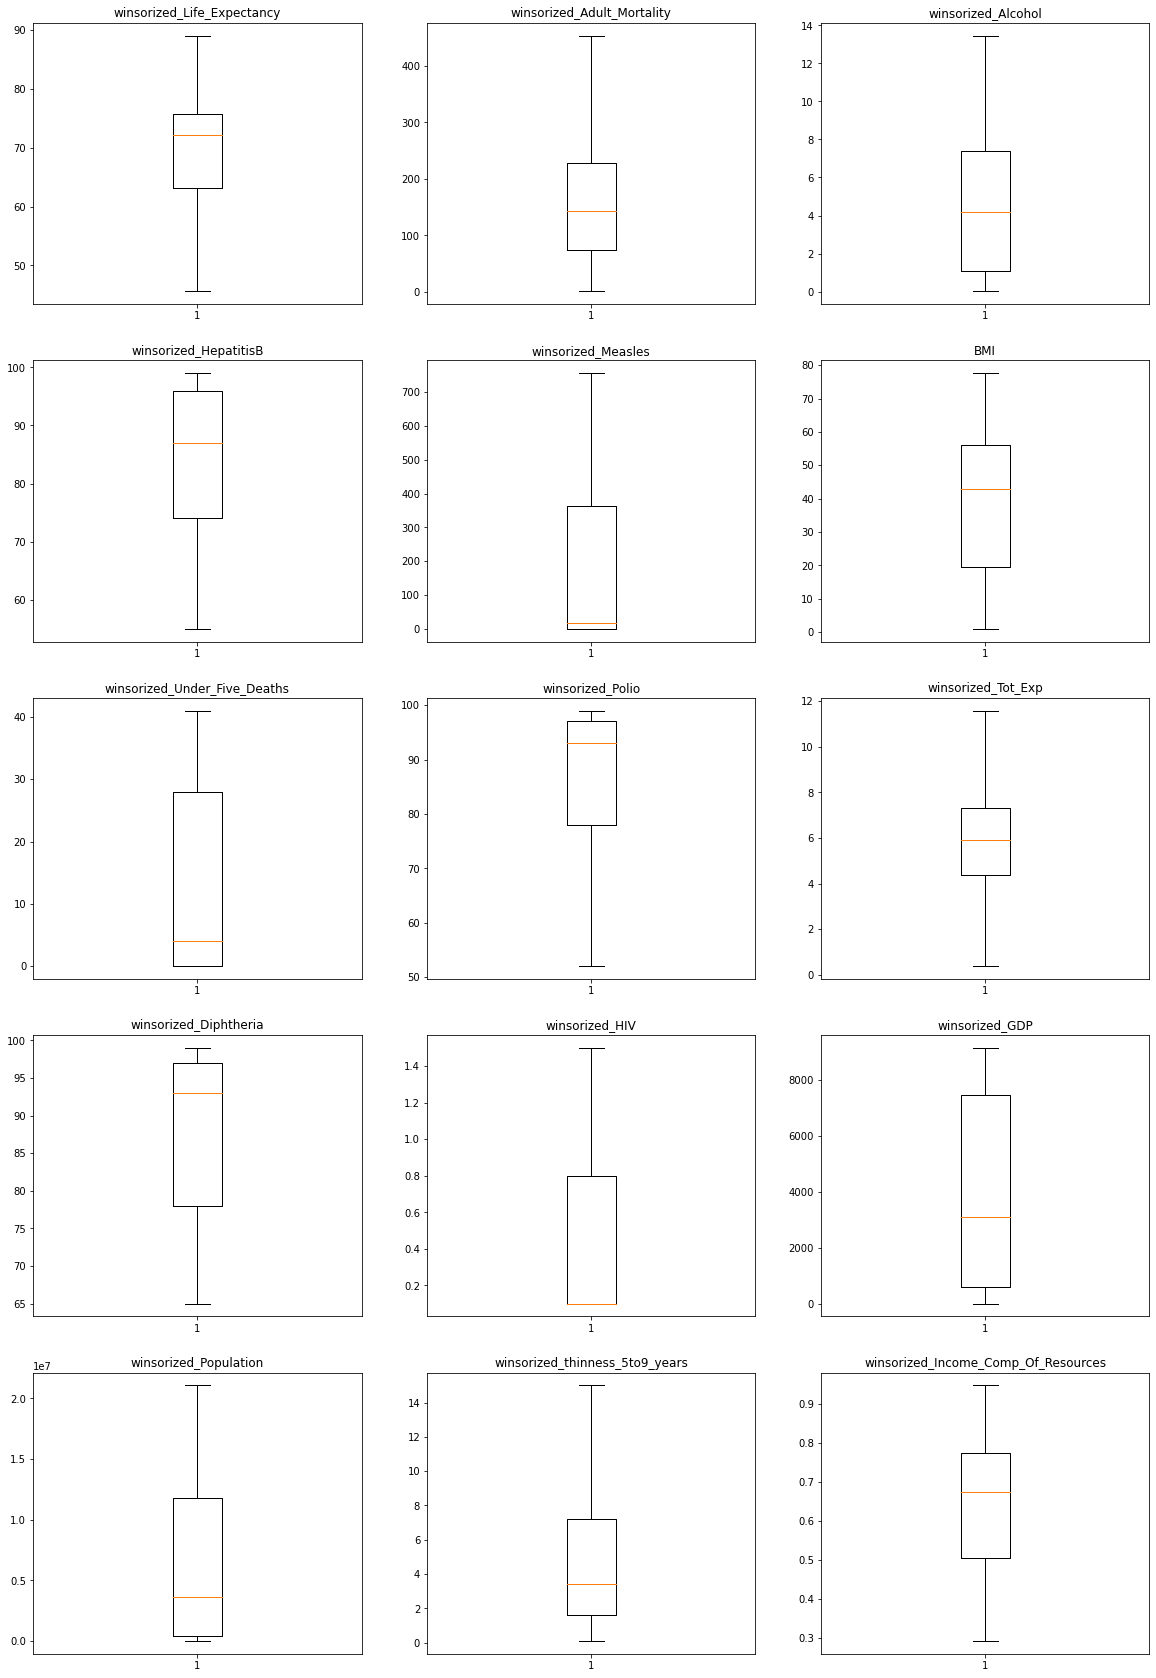

In [56]:
col_dict = {'winsorized_Life_Expectancy':1,'winsorized_Adult_Mortality':2,'winsorized_Alcohol':3,
            'winsorized_HepatitisB':4,'winsorized_Measles':5,'BMI':6,'winsorized_Under_Five_Deaths':7,'winsorized_Polio':8,'winsorized_Tot_Exp':9,
            'winsorized_Diphtheria':10,'winsorized_HIV':11,'winsorized_GDP':12,'winsorized_Population':13,'winsorized_thinness_5to9_years':14,
            'winsorized_Income_Comp_Of_Resources':15}

# # Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,3,i)
                     plt.boxplot(life_expectancy[variable],whis=1.5)
                     plt.title(variable)

plt.show()

## Exploratory Analysis


In [57]:
#Descriptive statistics of continuous variables.
life_expectancy.describe()

,Year,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 5-9 years,Income composition of resources,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_HepatitisB,winsorized_Measles,winsorized_BMI,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000
mean,2007.50000,69.224932,164.796448,4.655640,80.338718,2427.855874,38.235394,42.179303,82.534884,6.000580,82.302452,1.747712,7492.089256,1.276723e+07,4.881423,0.627419,69.242008,161.911544,4.642187,83.666929,206.816940,38.235394,13.323087,85.508245,5.967066,87.024788,0.470458,3975.898782,6.891336e+06,4.712331,0.640436
std,4.61056,9.523867,124.292079,3.918349,22.628026,11485.970937,19.851535,160.700547,23.342384,2.401776,23.632472,5.085542,13179.663443,5.393803e+07,4.484961,0.205503,9.477572,115.419394,3.883910,13.834182,302.692755,19.851535,16.421801,15.270591,2.296262,12.077651,0.569734,3493.291407,7.317413e+06,3.914411,0.171863
min,2000.00000,36.300000,1.000000,0.010000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.000000,45.600000,1.000000,0.010000,55.000000,0.000000,1.000000,0.000000,52.000000,0.370000,65.000000,0.100000,1.681350,3.400000e+01,0.100000,0.291000
25%,2003.75000,63.100000,74.000000,1.107500,74.099237,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,0.504000,63.100000,74.000000,1.107500,74.099237,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,0.504000
50%,2007.50000,72.100000,144.000000,4.160000,87.000000,17.000000,43.000000,4.000000,93.000000,5.905000,93.000000,0.100000,3112.560501,3.640009e+06,3.400000,0.673000,72.100000,144.000000,4.160000,87.000000,17.000000,43.000000,4.000000,93.000000,5.905000,93.000000,0.100000,3112.560501,3.640009e+06,3.400000,0.673000
75%,2011.25000,75.700000,228.000000,7.400000,96.000000,362.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7464.487887,1.181332e+07,7.200000,0.773000,75.700000,228.000000,7.400000,96.000000,362.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7464.487887,1.181332e+07,7.200000,0.773000
max,2015.00000,89.000000,723.000000,17.870000,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,28.600000,0.948000,89.000000,453.000000,13.450000,99.000000,756.000000,77.600000,41.000000,99.000000,11.590000,99.000000,1.500000,9143.128494,2.106296e+07,15.000000,0.948000


In [58]:
life_expectancy.shape

(2928, 33)

## Univariate Analysis

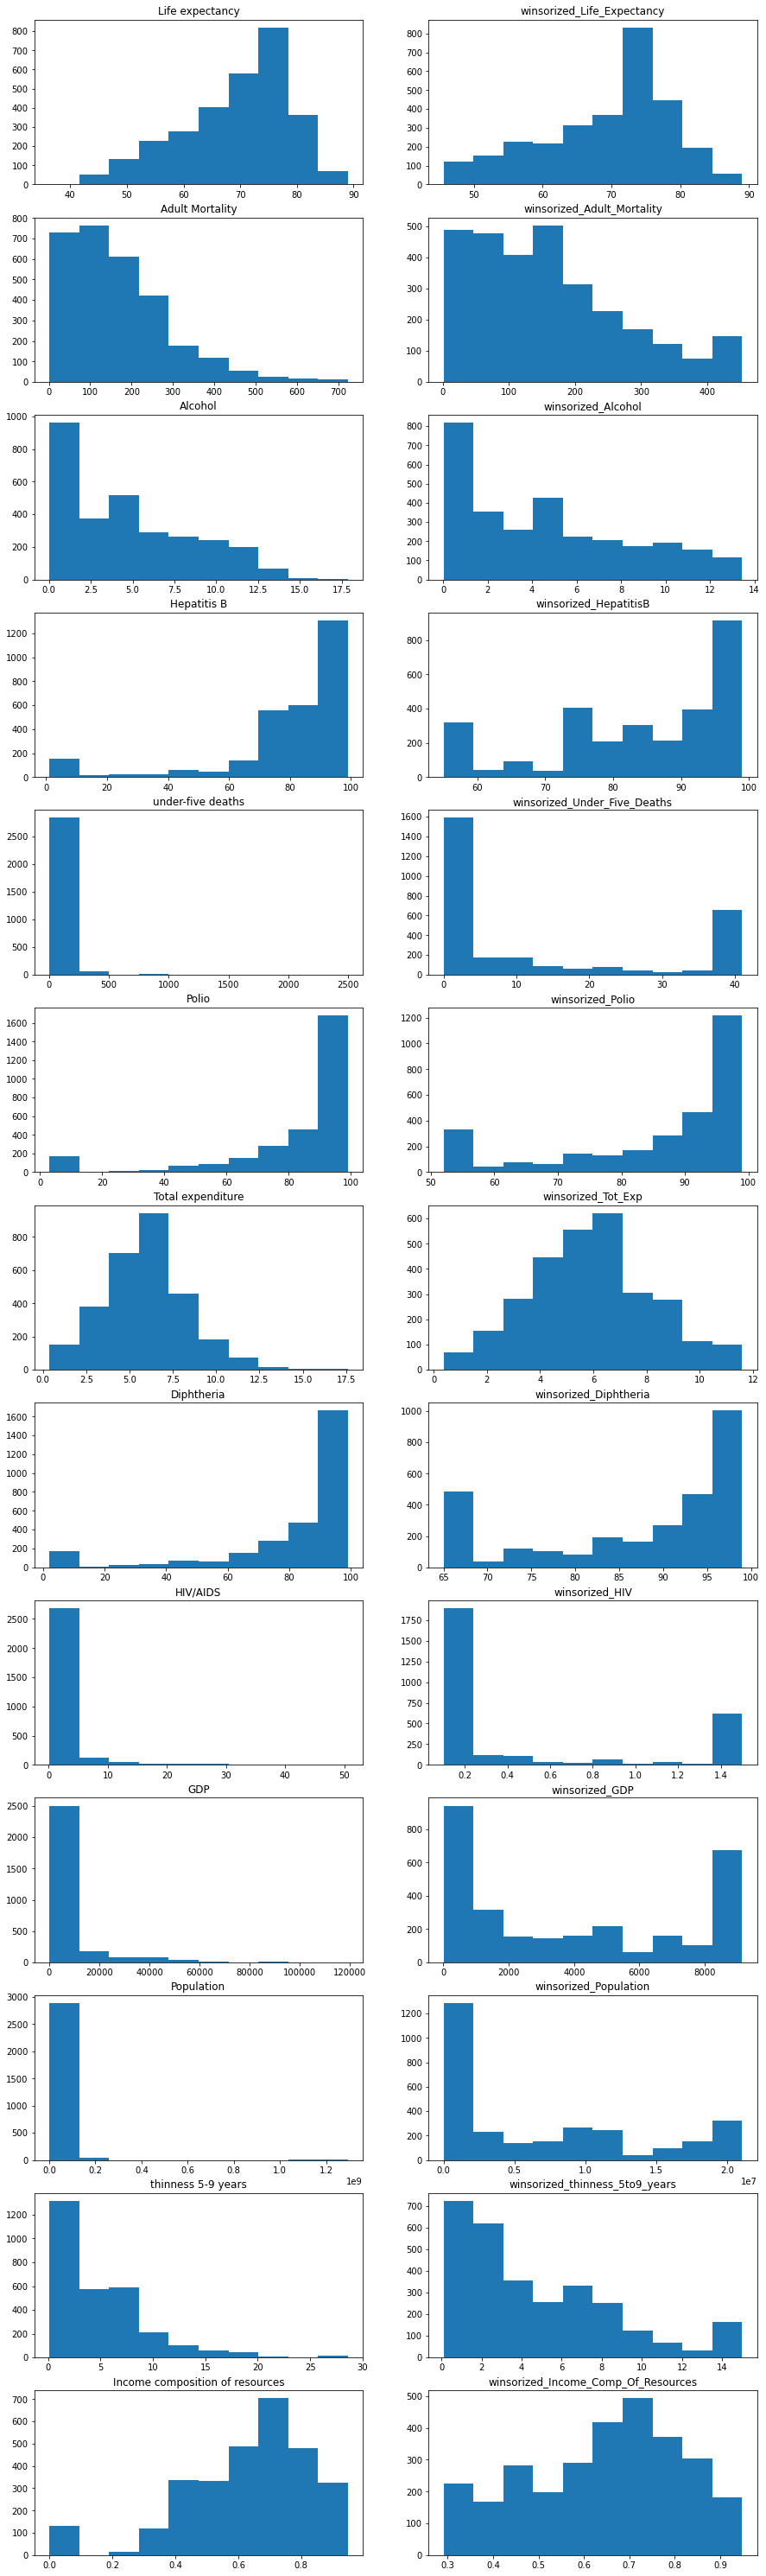

In [59]:
# Distribution of each numerical variable.
all_col = ['Life expectancy','winsorized_Life_Expectancy','Adult Mortality','winsorized_Adult_Mortality',
           'Alcohol','winsorized_Alcohol','Hepatitis B', 'winsorized_HepatitisB','under-five deaths','winsorized_Under_Five_Deaths',
           'Polio','winsorized_Polio','Total expenditure', 'winsorized_Tot_Exp','Diphtheria','winsorized_Diphtheria',
           'HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP', 'Population','winsorized_Population','thinness 5-9 years', 'winsorized_thinness_5to9_years',
           'Income composition of resources','winsorized_Income_Comp_Of_Resources']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(life_expectancy[all_col[i]])
    plt.title(all_col[i])

plt.show()

winsorized_Life_Expectancy is vsome what normally distributed.


In [202]:
# life_expectancy['log_Percentage_expenditure'] = np.log(life_expectancy['percentage expenditure'])
# life_expectancy['log_Population'] = np.log(life_expectancy['Population'])
#life_expectancy['log life expectancy'] = np.log(life_expectancy['Life expectancy'])
# life_expectancy['log_GDP'] = np.log(life_expectancy['GDP'])
# life_expectancy = life_expectancy.replace([np.inf, -np.inf], 0)
# life_expectancy['log_Percentage_expenditure']

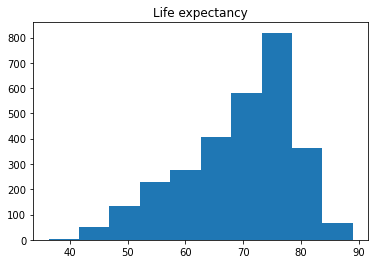

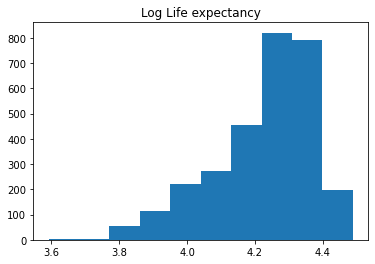

In [61]:
plt.hist(life_expectancy['Life expectancy'])
plt.title('Life expectancy')
plt.show()

plt.hist(np.log(life_expectancy['Life expectancy']))
plt.title('Log Life expectancy')
plt.show()

In [160]:
# life_exp = life_expectancy[['Year', 'Country', 'Status','winsorized_Life_Expectancy','winsorized_Adult_Mortality','infant deaths','winsorized_Alcohol',
#             'log_Percentage_expenditure','winsorized_HepatitisB','under-five deaths','winsorized_Polio',
#             'winsorized_Tot_Exp','winsorized_Diphtheria','winsorized_HIV','log_GDP','log_Population',
#             'winsorized_thinness_1to19_years','winsorized_thinness_5to9_years','winsorized_Income_Comp_Of_Resources',
#             'winsorized_Schooling']]
# plt.figure(figsize=(15,10))
# sns.heatmap(life_exp.corr(), annot =True, linewidths = 4)

Some insights from the heatmap are following:

Adult_mortality has negative relation with Schooling, Income_composition_of_resources and positive relation with HIV/AIDS.

Infant_deaths and Under_five_deaths have strong positive relationship.

Schooling and Alcohol have some positive relationship.

Percentage_expenditure has positive relation with Schooling, Income_composition_of_resources, GDP, and Life_expectancy.

HepatitisB has strong positive relation with Polio and Diphtheria. Polio also has strong positive relation with Diphtheria,HepatitisB, and Life_expectancy.

Diphtheria has strong positive relation with Polio and Life_expectancy.

--------

# 2. Data exploration 

In [154]:
life_expectancy.corr()

,Year,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 5-9 years,Income composition of resources,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_HepatitisB,winsorized_Measles,winsorized_BMI,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources
Year,1.000000,0.170033,-0.079052,-0.027982,0.134784,-0.081840,0.105237,-0.041980,0.095140,0.127624,0.135574,-0.138789,0.111453,0.019484,-0.048417,0.249424,0.169366,-0.066419,-0.028854,0.204443,-0.113406,0.105237,-0.044505,0.118110,0.129939,0.145489,-0.082011,0.190335,0.068924,-0.047030,0.223795
Life expectancy,0.170033,1.000000,-0.696359,0.394392,0.224516,-0.157586,0.562617,-0.222529,0.462885,0.215957,0.476950,-0.556556,0.433045,-0.019200,-0.467316,0.694118,0.999613,-0.690836,0.396400,0.315584,-0.337184,0.562617,-0.619140,0.573573,0.219680,0.598157,-0.796398,0.478607,0.010774,-0.516192,0.791820
Adult Mortality,-0.079052,-0.696359,1.000000,-0.191415,-0.147006,0.031176,-0.383577,0.094146,-0.273323,-0.113934,-0.273758,0.523821,-0.278763,-0.013002,0.305723,-0.441640,-0.694969,0.987172,-0.193275,-0.205020,0.203124,-0.383577,0.406661,-0.342007,-0.112062,-0.361126,0.601560,-0.283568,-0.002657,0.347598,-0.509818
Alcohol,-0.027982,0.394392,-0.191415,1.000000,0.078739,-0.052554,0.327848,-0.112331,0.215034,0.304064,0.217241,-0.051845,0.316459,-0.031687,-0.409749,0.417541,0.395885,-0.200091,0.999000,0.106872,-0.200995,0.327848,-0.364278,0.266430,0.310691,0.301555,-0.207579,0.375464,-0.039275,-0.432350,0.476671
Hepatitis B,0.134784,0.224516,-0.147006,0.078739,1.000000,-0.101375,0.152020,-0.193649,0.421998,0.067477,0.515811,-0.110742,0.075007,-0.107639,-0.119444,0.176277,0.225057,-0.147124,0.078152,0.916262,-0.196363,0.152020,-0.222869,0.474027,0.069356,0.536835,-0.206562,0.143814,-0.003216,-0.102613,0.204524
Measles,-0.081840,-0.157586,0.031176,-0.052554,-0.101375,1.000000,-0.175993,0.507718,-0.136307,-0.106341,-0.141966,0.030673,-0.068206,0.236595,0.220754,-0.115789,-0.158394,0.032486,-0.052321,-0.126100,0.377309,-0.175993,0.295439,-0.167675,-0.108390,-0.164721,0.108519,-0.090115,0.081856,0.183195,-0.121492
BMI,0.105237,0.562617,-0.383577,0.327848,0.152020,-0.175993,1.000000,-0.237855,0.285009,0.233925,0.283880,-0.243540,0.281521,-0.063211,-0.537798,0.484271,0.564022,-0.395726,0.328454,0.203732,-0.313595,1.000000,-0.470997,0.344667,0.230859,0.354081,-0.486983,0.357346,-0.015455,-0.565119,0.555681
under-five deaths,-0.041980,-0.222529,0.094146,-0.112331,-0.193649,0.507718,-0.237855,1.000000,-0.189001,-0.129577,-0.195912,0.037783,-0.111065,0.535514,0.472101,-0.161446,-0.223489,0.102244,-0.112426,-0.218252,0.346287,-0.237855,0.404927,-0.253211,-0.133839,-0.266060,0.127335,-0.162524,0.192356,0.318907,-0.192472
Polio,0.095140,0.462885,-0.273323,0.215034,0.421998,-0.136307,0.285009,-0.189001,1.000000,0.137309,0.672187,-0.159687,0.197317,-0.034349,-0.221729,0.360516,0.463711,-0.286770,0.215322,0.509374,-0.264702,0.285009,-0.367380,0.933806,0.142263,0.720420,-0.384097,0.257886,0.012547,-0.233837,0.412617
Total expenditure,0.127624,0.215957,-0.113934,0.304064,0.067477,-0.106341,0.233925,-0.129577,0.137309,1.000000,0.154561,-0.006621,0.124820,-0.066864,-0.275055,0.160556,0.219406,-0.130071,0.306881,0.074434,-0.157189,0.233925,-0.140474,0.161693,0.990249,0.176977,-0.112308,0.151787,-0.094612,-0.294794,0.175400


In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(life_expectancy.corr(), square=True, annot=True, linewidths=.5)

In [44]:
ix = life_expectancy.corr().sort_values('Life expectancy', ascending=False).index
df_sorted = life_expectancy.loc[:, ix]
df_sorted

,Life expectancy,winsorized_Life_Expectancy,winsorized_Income_Comp_Of_Resources,Income composition of resources,winsorized_Diphtheria,winsorized_Polio,BMI,winsorized_BMI,winsorized_GDP,Diphtheria,Polio,GDP,winsorized_Alcohol,Alcohol,winsorized_HepatitisB,Hepatitis B,winsorized_Tot_Exp,Total expenditure,Year,winsorized_Population,Population,Measles,under-five deaths,winsorized_Measles,thinness 5-9 years,winsorized_thinness_5to9_years,HIV/AIDS,winsorized_Under_Five_Deaths,winsorized_Adult_Mortality,Adult Mortality,winsorized_HIV
0,65.0,65.0,0.479,0.479,65.0,52.0,19.1,19.1,584.259210,65.0,6.0,584.259210,0.010000,0.010000,65.000000,65.000000,8.16,8.16,2015,2.106296e+07,3.373649e+07,1154,83,756,17.3,15.0,0.1,41,263.0,263.0,0.1
16,77.8,77.8,0.762,0.762,99.0,99.0,58.0,58.0,3954.227830,99.0,99.0,3954.227830,4.600000,4.600000,99.000000,99.000000,6.00,6.00,2015,2.887300e+04,2.887300e+04,0,0,0,1.3,1.3,0.1,0,74.0,74.0,0.1
32,75.6,75.6,0.743,0.743,95.0,95.0,59.5,59.5,4132.762920,95.0,95.0,4132.762920,5.288333,5.288333,95.000000,95.000000,7.08,7.08,2015,2.106296e+07,3.987153e+07,63,24,63,5.8,5.8,0.1,24,19.0,19.0,0.1
48,52.4,52.4,0.531,0.531,65.0,52.0,23.3,23.3,3695.793748,64.0,7.0,3695.793748,5.288333,5.288333,64.000000,64.000000,7.08,7.08,2015,2.785935e+06,2.785935e+06,118,98,118,8.2,8.2,1.9,41,335.0,335.0,1.5
64,76.4,76.4,0.784,0.784,99.0,86.0,47.7,47.7,9143.128494,99.0,86.0,13566.954100,5.288333,5.288333,99.000000,99.000000,7.08,7.08,2015,1.109741e+07,1.109741e+07,0,0,0,3.3,3.3,0.2,0,13.0,13.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,72.5,72.5,0.670,0.670,77.0,86.0,53.4,53.4,4708.515191,77.0,86.0,4708.515191,8.010000,8.010000,55.000000,5.000000,4.91,4.91,2000,9.440444e+06,9.440444e+06,22,13,22,1.7,1.7,0.1,13,168.0,168.0,0.1
2889,73.4,73.4,0.569,0.569,96.0,96.0,9.2,9.2,4708.515191,96.0,96.0,4708.515191,1.600000,1.600000,74.035294,74.035294,4.89,4.89,2000,9.440444e+06,9.440444e+06,16512,43,756,16.4,15.0,0.1,41,139.0,139.0,0.1
2905,68.0,68.0,0.436,0.436,74.0,74.0,31.2,31.2,4708.515191,74.0,74.0,4708.515191,0.070000,0.070000,55.000000,14.000000,4.14,4.14,2000,9.440444e+06,9.440444e+06,0,66,0,14.1,14.1,0.1,41,252.0,252.0,0.1
2921,43.8,45.6,0.418,0.418,85.0,85.0,16.8,16.8,341.955625,85.0,85.0,341.955625,2.620000,2.620000,74.035294,74.035294,7.16,7.16,2000,1.531221e+06,1.531221e+06,30930,72,756,7.5,7.5,18.7,41,453.0,614.0,1.5


In [40]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths',
       'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Population', 'thinness 5-9 years', 'Income composition of resources',
       'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Alcohol', 'winsorized_HepatitisB', 'winsorized_Measles',
       'winsorized_BMI', 'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_5to9_years',
       'winsorized_Income_Comp_Of_Resources'],
      dtype='object')

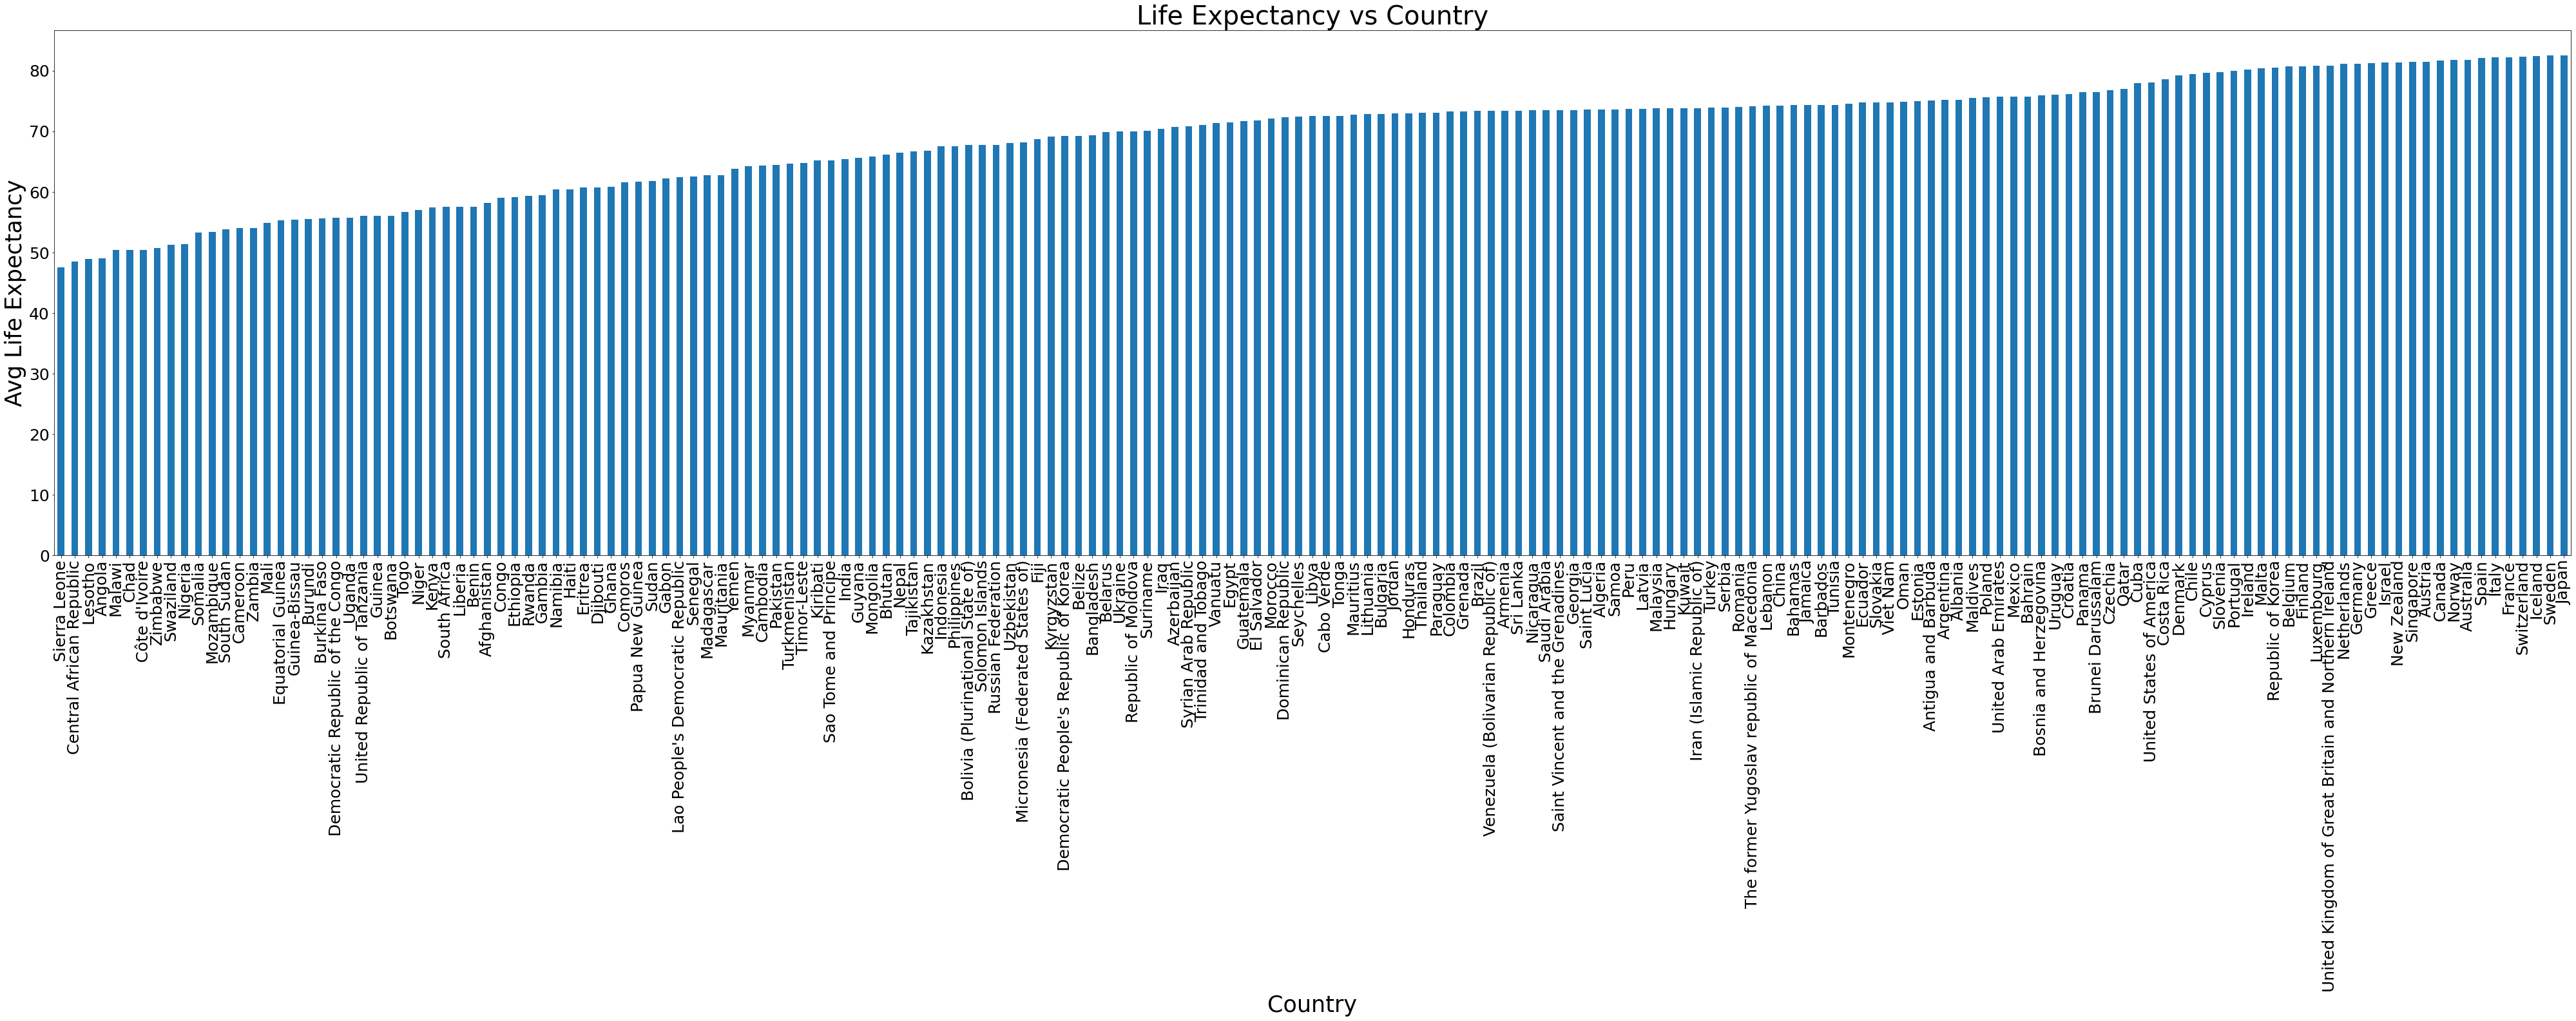

In [173]:
le_country = life_expectancy.groupby('Country')['winsorized_Life_Expectancy'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(70,15), fontsize=25)
plt.title("Life Expectancy vs Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life Expectancy",fontsize=35)
plt.show()

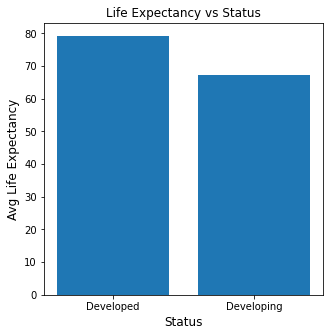

In [62]:
plt.figure(figsize=(5,5))
plt.bar(life_expectancy.groupby('Status')['Status'].count().index,life_expectancy.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life Expectancy",fontsize=12)
plt.title("Life Expectancy vs Status")
plt.show()

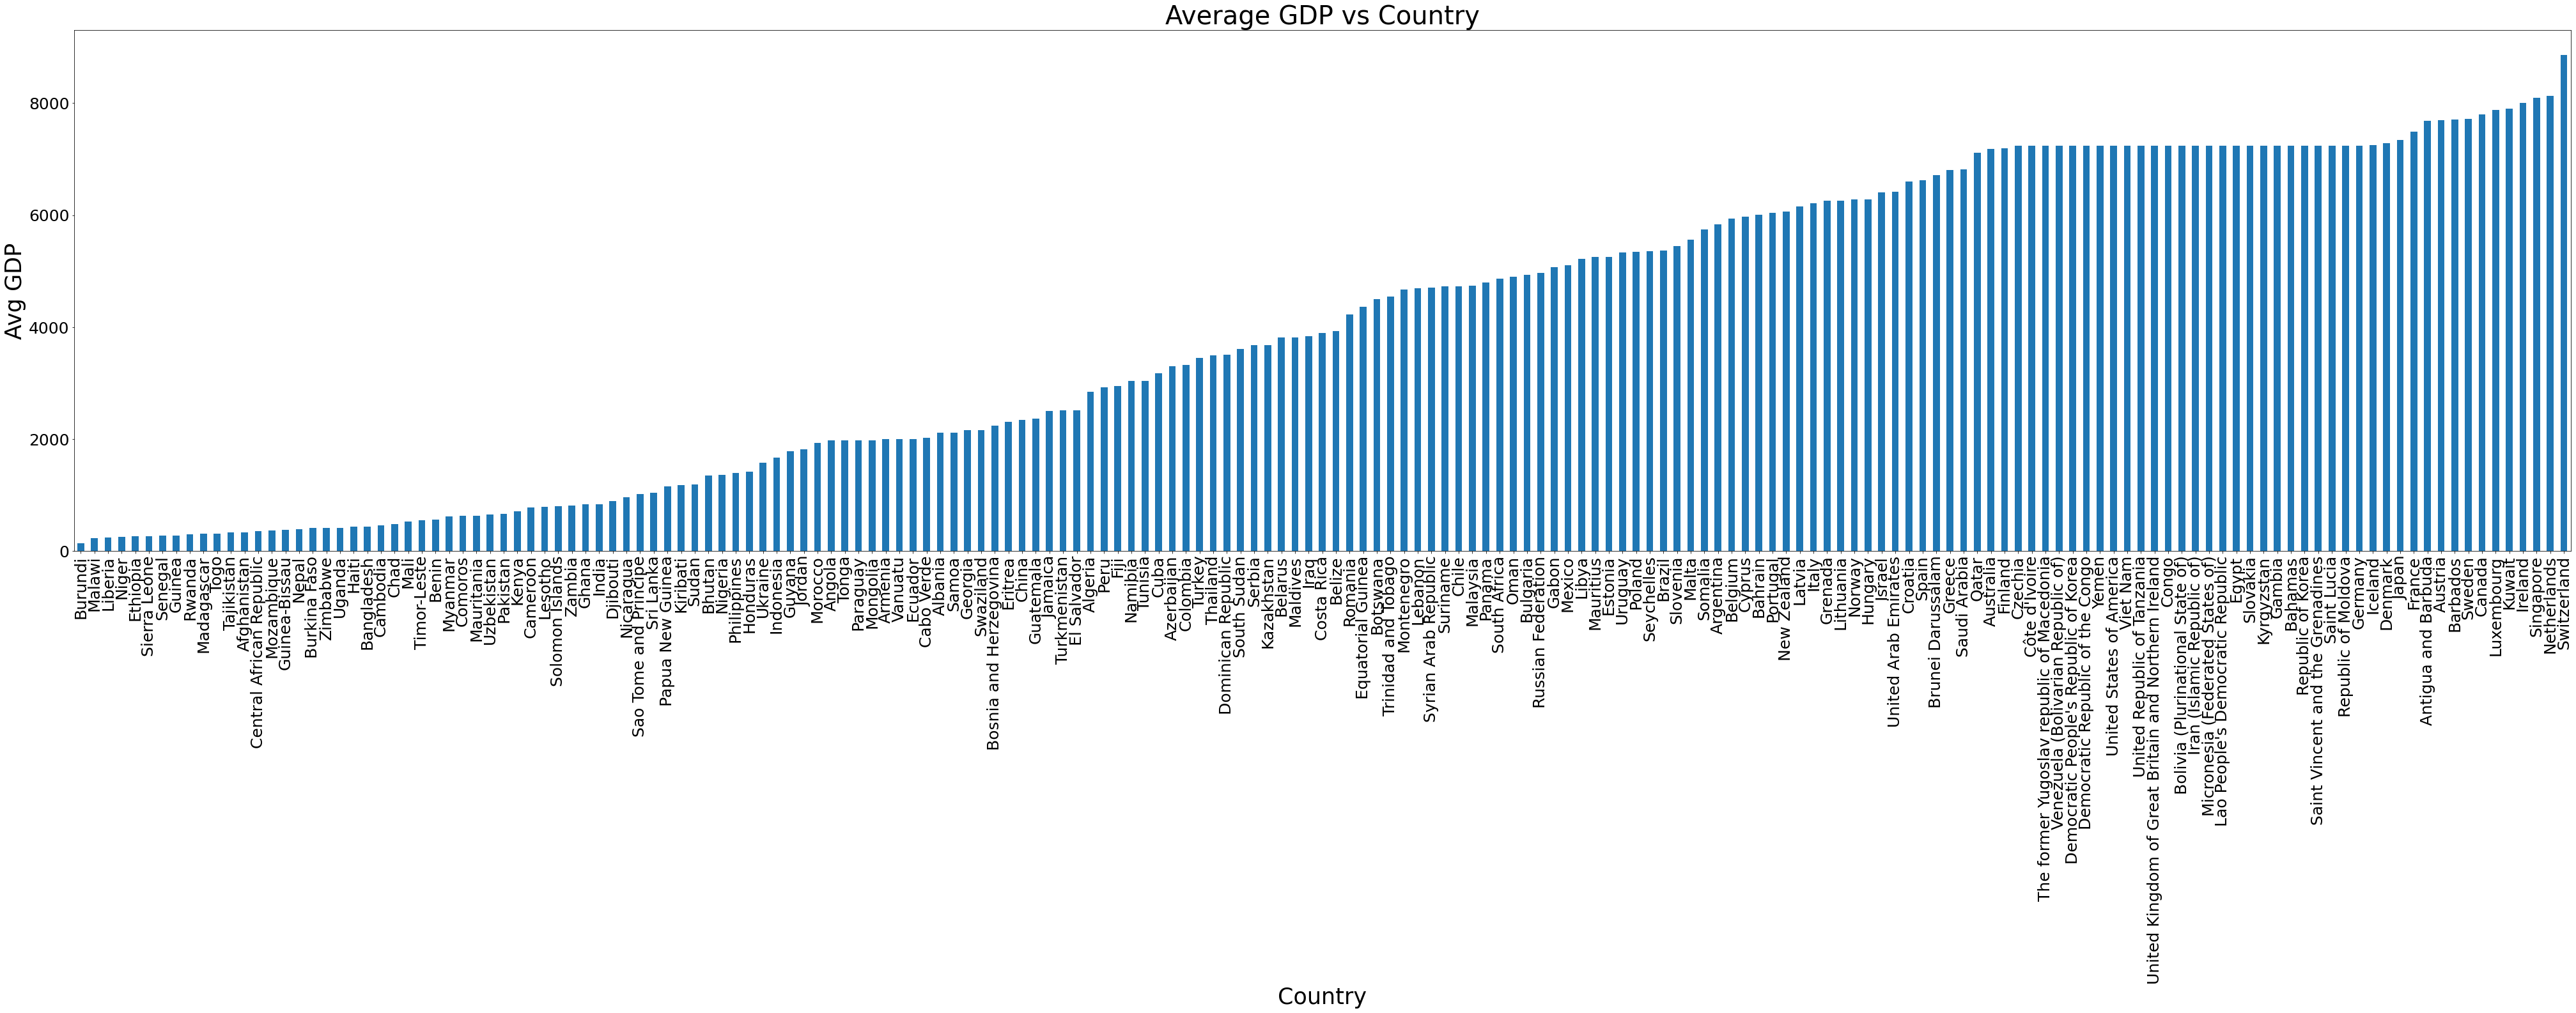

In [172]:
le_country = life_expectancy.groupby('Country')['winsorized_GDP'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(70,15), fontsize=25)
plt.title("Average GDP vs Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg GDP",fontsize=35)
plt.show()

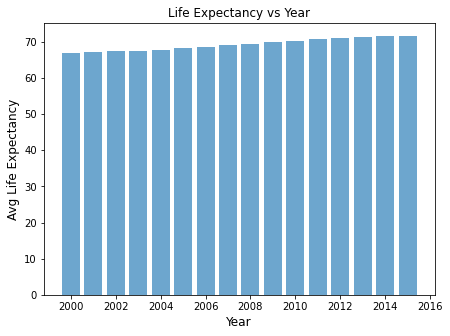

In [65]:
plt.figure(figsize=(7,5))
plt.bar(life_expectancy.groupby('Year')['Year'].count().index,life_expectancy.groupby('Year')['winsorized_Life_Expectancy'].mean(),alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life Expectancy",fontsize=12)
plt.title("Life Expectancy vs Year")
plt.show()

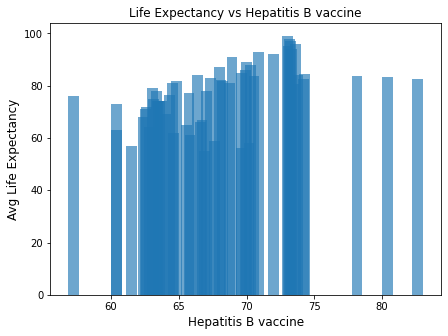

In [69]:
 plt.figure(figsize=(7,5))
plt.bar(life_expectancy.groupby('winsorized_HepatitisB')['winsorized_Life_Expectancy'].mean(),life_expectancy.groupby('winsorized_HepatitisB')['winsorized_HepatitisB'].count().index,alpha=0.65)
plt.xlabel("Hepatitis B vaccine",fontsize=12)
plt.ylabel("Avg Life Expectancy",fontsize=12)
plt.title("Life Expectancy vs Hepatitis B vaccine")
plt.show()

'Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths',
       'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Population', 'thinness 5-9 years', 'Income composition of resources',
       'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Alcohol', 'winsorized_HepatitisB', 'winsorized_Measles',
       'winsorized_BMI', 'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_5to9_years',
       'winsorized_Income_Comp_Of_Resources'

In [194]:
def test(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [195]:
x, y = test(life_expectancy["Life expectancy"])

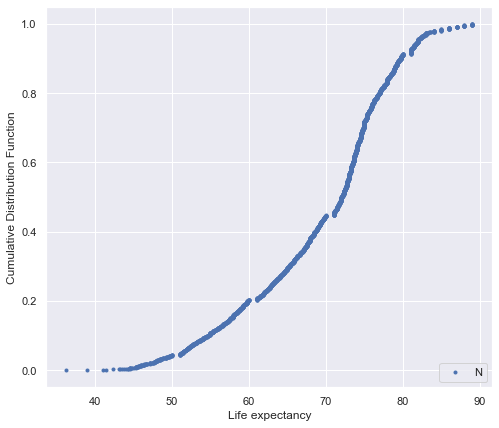

In [198]:
plt.figure(figsize=(8,7))
sns.set()
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Life expectancy")
plt.ylabel("Cumulative Distribution Function")
plt.legend(('Normal Distribution'), loc='lower right')

In [175]:
# le_country = life_expectancy.groupby('Country')['winsorized_Polio'].mean().sort_values(ascending=True)
# le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
# plt.title("Polio w.r.t Country",fontsize=40)
# plt.xlabel("Country",fontsize=35)
# plt.ylabel("Avg Polio Cases",fontsize=35)
# plt.show()

In [186]:
# le_country = life_expectancy.groupby('Country')['winsorized_Population'].mean().sort_values(ascending=True)
# le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
# plt.title("Population w.r.t Country",fontsize=40)
# plt.xlabel("Country",fontsize=35)
# plt.ylabel("Avg Population",fontsize=35)
# plt.show()

In [187]:
# le_country = life_expectancy.groupby('Country')['winsorized_thinness_5to9_years'].mean().sort_values(ascending=True)
# le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
# plt.title("Thinness 5 to 9 years w.r.t Country",fontsize=40)
# plt.xlabel("Country",fontsize=35)
# plt.ylabel("Avg thinness 5 to 9 years ",fontsize=35)
# plt.show()

In [188]:
# le_country = life_expectancy.groupby('Country')['winsorized_Tot_Exp'].mean().sort_values(ascending=True)
# le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
# plt.title(" Total Expenditure w.r.t Country",fontsize=40)
# plt.xlabel("Country",fontsize=35)
# plt.ylabel("Avg Total Expenditure",fontsize=35)
# plt.show()

In [189]:
# le_country = life_expectancy.groupby('Country')['winsorized_Under_Five_Deaths'].mean().sort_values(ascending=True)
# le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
# plt.title(" Under five Deaths w.r.t Country",fontsize=40)
# plt.xlabel("Country",fontsize=35)
# plt.ylabel("Avg under 5 deaths",fontsize=35)
# plt.show()

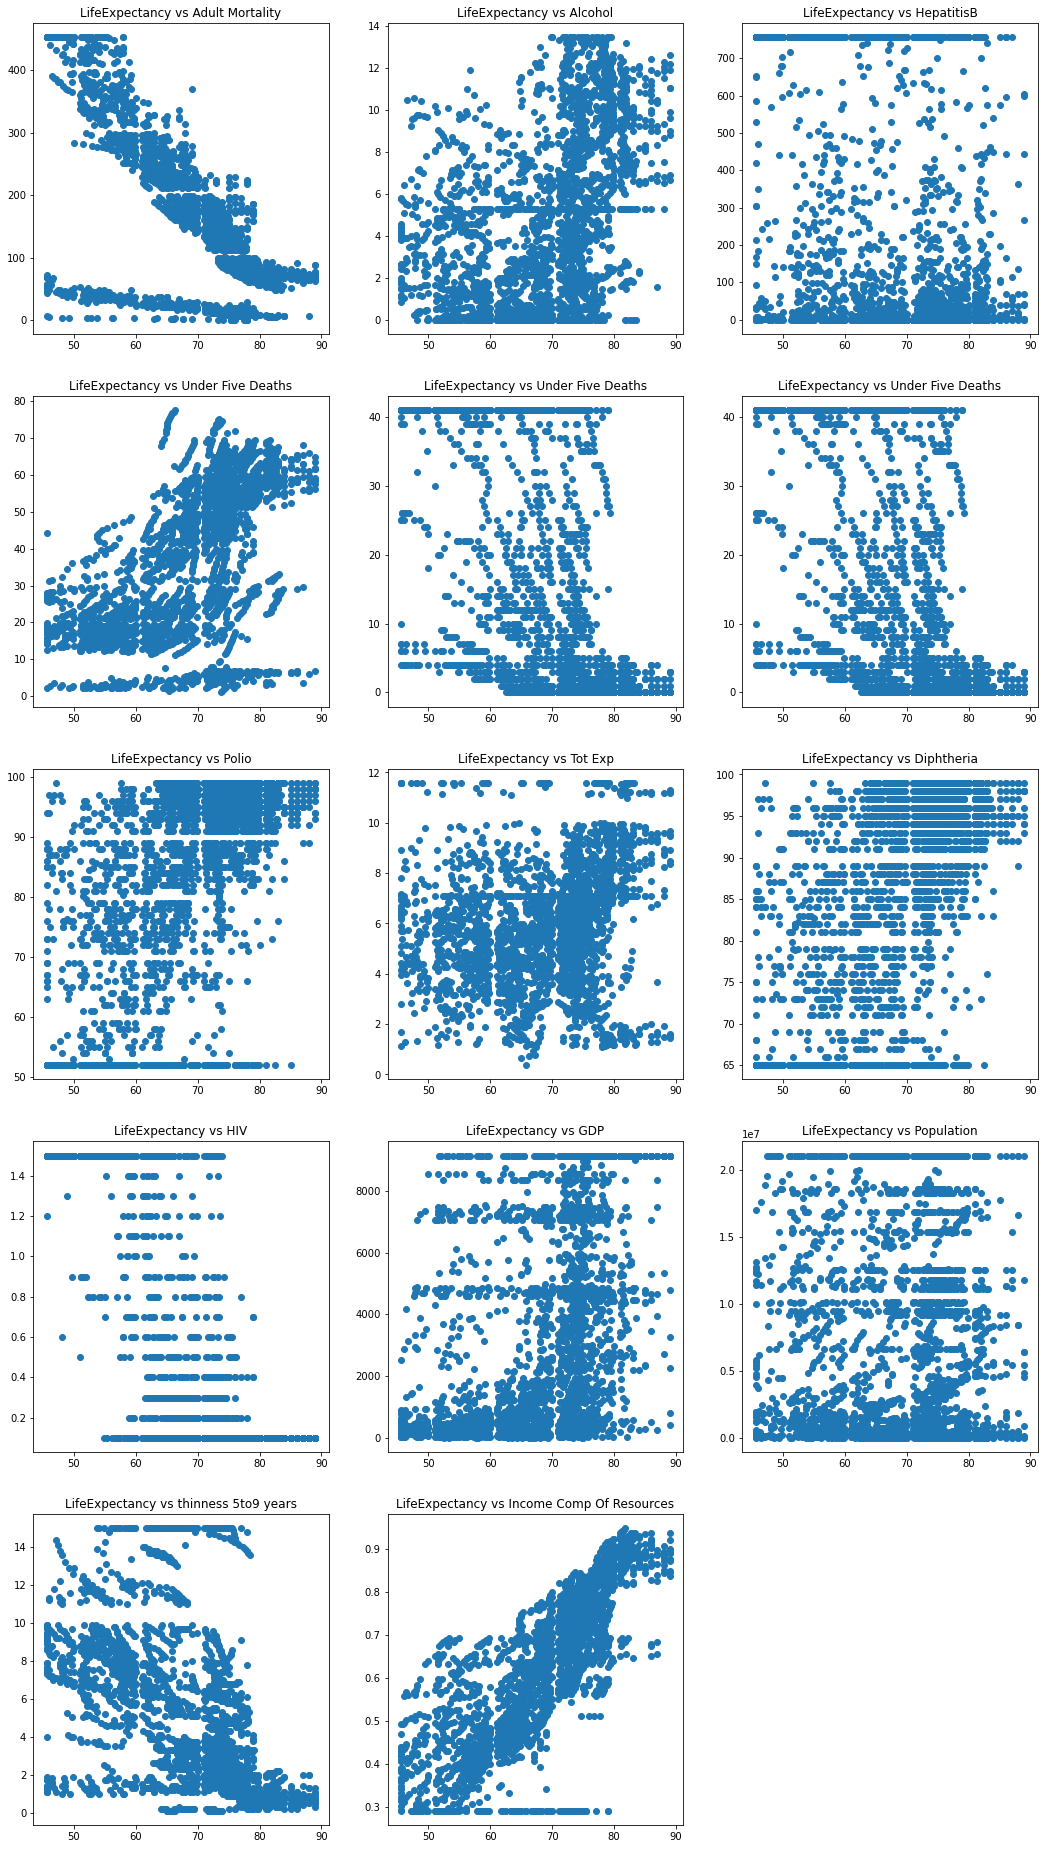

In [66]:
# Scatter plot between the target variable(winsorized_Life_Expectancy) and all continuous variables.
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(life_expectancy["winsorized_Life_Expectancy"], life_expectancy["winsorized_Adult_Mortality"])
plt.title("LifeExpectancy vs Adult Mortality")

plt.subplot(6,3,2)
plt.scatter(life_expectancy["winsorized_Life_Expectancy"],life_expectancy["winsorized_Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,3)
plt.scatter(life_expectancy["winsorized_Life_Expectancy"], life_expectancy["winsorized_Measles"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,4)
plt.scatter(life_expectancy["winsorized_Life_Expectancy"], life_expectancy["BMI"])
plt.title("LifeExpectancy vs Under Five Deaths")

plt.subplot(6,3,5)
plt.scatter(life_expectancy["winsorized_Life_Expectancy"], life_expectancy["winsorized_Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under Five Deaths")

plt.subplot(6,3,6)
plt.scatter(life_expectancy["winsorized_Life_Expectancy"], life_expectancy["winsorized_Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under Five Deaths")

plt.subplot(6,3,7)
plt.scatter(life_expectancy["winsorized_Life_Expectancy"], life_expectancy["winsorized_Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(life_expectancy["winsorized_Life_Expectancy"], life_expectancy["winsorized_Tot_Exp"])
plt.title("LifeExpectancy vs Tot Exp")

plt.subplot(6,3,9)
plt.scatter(life_expectancy["winsorized_Life_Expectancy"], life_expectancy["winsorized_Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(life_expectancy["winsorized_Life_Expectancy"], life_expectancy["winsorized_HIV"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(life_expectancy["winsorized_Life_Expectancy"], life_expectancy["winsorized_GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(life_expectancy["winsorized_Life_Expectancy"], life_expectancy["winsorized_Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(life_expectancy["winsorized_Life_Expectancy"], life_expectancy["winsorized_thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness 5to9 years")

plt.subplot(6,3,14)
plt.scatter(life_expectancy["winsorized_Life_Expectancy"], life_expectancy["winsorized_Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income Comp Of Resources")

plt.show()

In [42]:
# # Distributions of Immunization coverage for Polio, HepatitisB and Diphtheria
# plt.figure(figsize=(8,14))
# sns.set(style="ticks")

# plt.subplot(3,1,1)
# p1 = sns.distplot(life_expectancy['winsorized_Polio'],color='r')
# p1.set_xlabel("Ploio",fontsize=14)
# p1.set_ylabel("% Immunization Coverage",fontsize=14)
# p1.set_title("Immunization for Polio, HepatitisB and Diphtheria",fontsize=14)

# plt.subplot(3,1,2)
# p2 = sns.distplot(life_expectancy['winsorized_HepatitisB'],color='b')
# p2.set_xlabel("HepatitisB",fontsize=14)
# p2.set_ylabel("% Immunization Coverage",fontsize=14)

# plt.subplot(3,1,3)
# p3 = sns.distplot(life_expectancy['winsorized_Diphtheria'],color='orange')
# p3.set_xlabel("Diphtheria",fontsize=14)
# p3.set_ylabel("% Immunization Coverage",fontsize=14)

# plt.show()

### Data exploration

-------

### Model

In [75]:
df = life_expectancy[['Country', 'Year', 'Status', 'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Alcohol', 'winsorized_HepatitisB', 'winsorized_Measles',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_5to9_years', 'winsorized_Income_Comp_Of_Resources',
       'winsorized_BMI']]

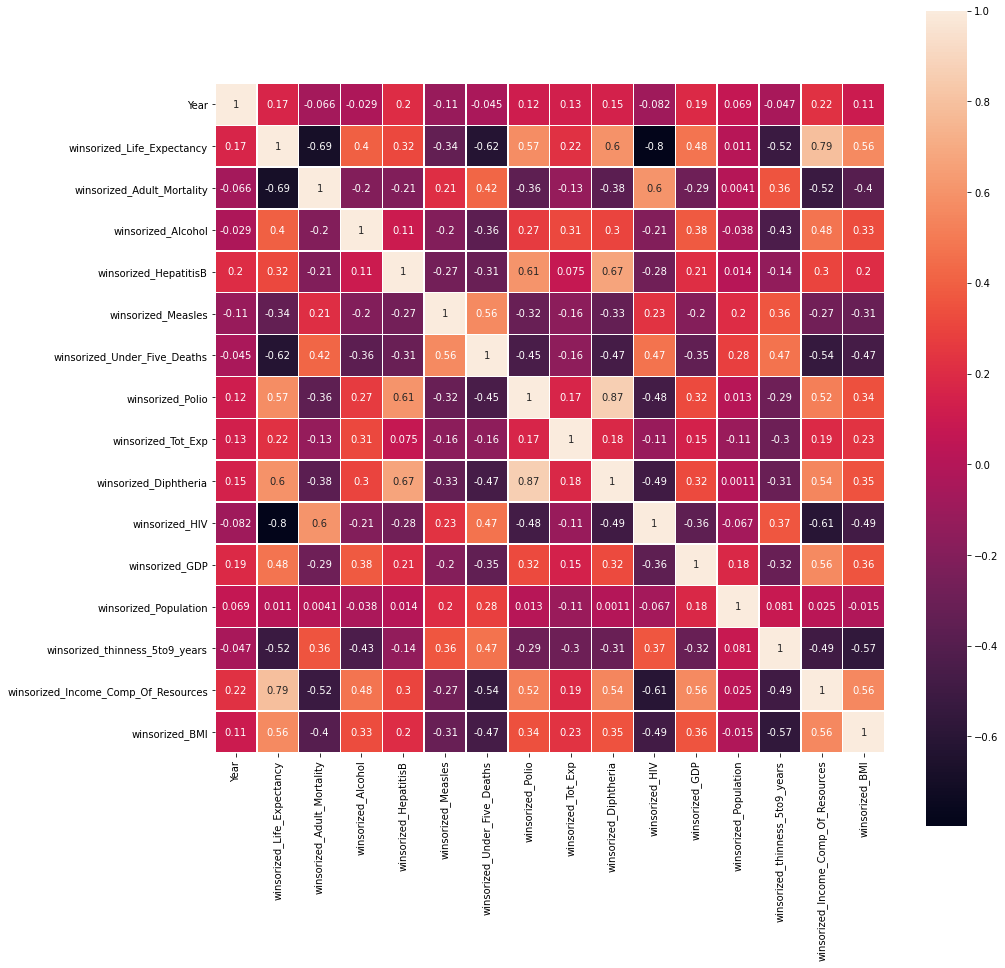

In [155]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5)

In [76]:
df

,Country,Year,Status,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_HepatitisB,winsorized_Measles,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_BMI
0,Afghanistan,2015,Developing,65.0,263.0,0.010000,65.000000,756,41,52.0,8.16,65.0,0.1,584.259210,2.106296e+07,15.0,0.479,19.1
16,Albania,2015,Developing,77.8,74.0,4.600000,99.000000,0,0,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.3,0.762,58.0
32,Algeria,2015,Developing,75.6,19.0,5.288333,95.000000,63,24,95.0,7.08,95.0,0.1,4132.762920,2.106296e+07,5.8,0.743,59.5
48,Angola,2015,Developing,52.4,335.0,5.288333,64.000000,118,41,52.0,7.08,65.0,1.5,3695.793748,2.785935e+06,8.2,0.531,23.3
64,Antigua and Barbuda,2015,Developing,76.4,13.0,5.288333,99.000000,0,0,86.0,7.08,99.0,0.2,9143.128494,1.109741e+07,3.3,0.784,47.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,Venezuela (Bolivarian Republic of),2000,Developing,72.5,168.0,8.010000,55.000000,22,13,86.0,4.91,77.0,0.1,4708.515191,9.440444e+06,1.7,0.670,53.4
2889,Viet Nam,2000,Developing,73.4,139.0,1.600000,74.035294,756,41,96.0,4.89,96.0,0.1,4708.515191,9.440444e+06,15.0,0.569,9.2
2905,Yemen,2000,Developing,68.0,252.0,0.070000,55.000000,0,41,74.0,4.14,74.0,0.1,4708.515191,9.440444e+06,14.1,0.436,31.2
2921,Zambia,2000,Developing,45.6,453.0,2.620000,74.035294,756,41,85.0,7.16,85.0,1.5,341.955625,1.531221e+06,7.5,0.418,16.8


In [ ]:
df['class'] = df[df['winsorized_Life_Expectancy'] <= 65].

In [109]:
low = df[df['winsorized_Life_Expectancy'] <= 65]
high = df[df['winsorized_Life_Expectancy'] > 65]

In [111]:
xx = low.winsorized_Life_Expectancy.mean()
xx

56.90046296296291

In [112]:
yy = high.winsorized_Life_Expectancy.mean()
yy

74.40823643410853

In [ ]:
ax = sns.boxplot(x="low", y=winsorized_Life_Expectancy.mean(), data=df)

In [85]:
mean = df[df['winsorized_Life_Expectancy'] <= 65]
mean.describe()

,Year,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_HepatitisB,winsorized_Measles,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_BMI
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,8.640000e+02,864.000000,864.000000,864.000000
mean,2006.805556,56.900463,271.008102,2.845328,76.311536,360.982639,27.607639,72.224239,5.435077,76.215325,1.151157,1937.632226,6.780256e+06,7.410891,0.458654,22.253617
std,4.547590,5.527911,132.486922,2.809566,12.386091,335.014043,16.019976,15.743447,2.124559,11.374511,0.534596,2727.830417,7.289940e+06,3.637708,0.107189,11.608248
min,2000.000000,45.600000,2.000000,0.010000,55.000000,0.000000,0.000000,52.000000,0.650000,65.000000,0.100000,3.685949,1.679000e+03,0.100000,0.291000,2.100000
25%,2003.000000,52.800000,227.750000,0.377500,71.000000,12.750000,10.000000,54.000000,3.967500,65.000000,0.800000,264.904696,6.940280e+05,5.400000,0.388750,15.900000
50%,2006.000000,57.600000,284.000000,1.840000,76.522124,242.500000,41.000000,74.000000,5.295000,74.000000,1.500000,564.629442,2.820164e+06,7.500000,0.452000,19.500000
75%,2011.000000,62.000000,365.000000,5.001772,84.000000,756.000000,41.000000,85.674451,6.760000,86.000000,1.500000,2198.785874,1.189775e+07,9.200000,0.514000,27.125000
max,2015.000000,65.000000,453.000000,11.890000,99.000000,756.000000,41.000000,99.000000,11.590000,99.000000,1.500000,9143.128494,2.106296e+07,15.000000,0.748000,73.400000


In [63]:
over = df[df['winsorized_Life_Expectancy'] > 65]
over.describe()

,Year,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_HepatitisB,winsorized_Measles,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_BMI
count,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2.064000e+03,2064.000000,2064.000000,2064.000000
mean,2007.790698,74.408236,116.243217,5.394360,86.745930,142.282461,7.343508,91.068992,6.189759,91.549679,0.185514,4829.126643,6.937835e+06,3.582701,0.716531,44.925440
std,4.606766,4.916042,66.983795,4.022689,13.236982,262.534779,12.410874,11.060177,2.329112,9.133381,0.256318,3425.312367,7.330146e+06,3.446400,0.132167,18.735259
min,2000.000000,65.100000,1.000000,0.010000,55.000000,0.000000,0.000000,52.000000,0.370000,65.000000,0.100000,1.681350,3.400000e+01,0.100000,0.291000,1.000000
25%,2004.000000,71.500000,69.000000,1.730000,81.000000,0.000000,0.000000,89.000000,4.600000,89.000000,0.100000,1436.032805,3.289092e+05,1.200000,0.646750,33.475000
50%,2008.000000,74.100000,123.000000,5.288333,93.000000,4.000000,1.000000,95.000000,6.305000,95.000000,0.100000,4599.303043,3.918678e+06,2.400000,0.725000,52.300000
75%,2012.000000,77.700000,165.000000,8.632500,97.000000,101.500000,8.000000,98.000000,7.660000,98.000000,0.100000,9143.128494,1.181332e+07,4.800000,0.810000,58.125000
max,2015.000000,89.000000,371.000000,13.450000,99.000000,756.000000,41.000000,99.000000,11.590000,99.000000,1.500000,9143.128494,2.106296e+07,15.000000,0.948000,77.600000


In [70]:
# df = pd.DataFrame(np.random.randn(10, 3),
#                   columns=['Col1', 'Col2', 'Col3'])
# df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A',
#                      'B', 'B', 'B', 'B', 'B'])
# df['Y'] = pd.Series(['A', 'B', 'A', 'B', 'A',
#                      'B', 'A', 'B', 'A', 'B'])
# boxplot = df.boxplot(column=['Col1', 'Col2'], by=['X', 'Y'])

In [71]:
# df.corr()

In [72]:
# df.to_csv("new.csv")

In [77]:
cat_columns = df[['Country', 'Year', 'Status']].columns
num_columns = df.drop(columns = cat_columns).columns

df_cat = pd.get_dummies(df[cat_columns].astype(str), drop_first = True)

df_prep = pd.concat([df[num_columns], df_cat], axis = 1)
df_prep

,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_HepatitisB,winsorized_Measles,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_BMI,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia (Plurinational State of),Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cabo Verde,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,Country_Congo,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czechia,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Gambia,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Grenada,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran (Islamic Republic of),Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kiribati,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Micronesia (Federated States of),Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Norway,Country_Oman,Country_Pakistan,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Lucia,Country_Saint Vincent and the Grenadines,Country_Samoa,Country_Sao Tome and Principe,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developing
0,65.0,263.0,0.010000,65.000000

In [78]:
df_prep.describe()

,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_HepatitisB,winsorized_Measles,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_BMI,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia (Plurinational State of),Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cabo Verde,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,Country_Congo,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czechia,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Gambia,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Grenada,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran (Islamic Republic of),Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kiribati,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Micronesia (Federated States of),Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Norway,Country_Oman,Country_Pakistan,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Lucia,Country_Saint Vincent and the Grenadines,Country_Samoa,Country_Sao Tome and Principe,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developing
count,2928.000000,2928.000000,2

In [79]:
df_prep.columns

Index(['winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Alcohol', 'winsorized_HepatitisB', 'winsorized_Measles',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       ...
       'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015',
       'Status_Developing'],
      dtype='object', length=213)

In [80]:
x = df_prep.drop(columns = 'winsorized_Life_Expectancy', axis = 1)
y = df_prep['winsorized_Life_Expectancy']

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [81]:
# x = df_prep.drop(columns = 'winsorized_Life_Expectancy', axis = 1)
# y = df_prep['winsorized_Life_Expectancy']

In [91]:
x

,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_HepatitisB,winsorized_Measles,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_BMI,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia (Plurinational State of),Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cabo Verde,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,Country_Congo,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czechia,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Gambia,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Grenada,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran (Islamic Republic of),Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kiribati,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Micronesia (Federated States of),Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Norway,Country_Oman,Country_Pakistan,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Lucia,Country_Saint Vincent and the Grenadines,Country_Samoa,Country_Sao Tome and Principe,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developing
0,263.0,0.010000,65.000000,756,41,52.0,8.16,65.0,0.1,584.2

In [92]:
y =df_prep['winsorized_Life_Expectancy']
y

0       65.0
16      77.8
32      75.6
48      52.4
64      76.4
        ... 
2873    72.5
2889    73.4
2905    68.0
2921    45.6
2937    46.0
Name: winsorized_Life_Expectancy, Length: 2928, dtype: float64

## Linear Regression

In [82]:
# x_constant = sm.add_constant(x)

In [83]:
# x_constant

In [101]:
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     winsorized_Life_Expectancy   R-squared:                       0.961
Model:                                    OLS   Adj. R-squared:                  0.956
Method:                         Least Squares   F-statistic:                     212.5
Date:                        Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                                19:23:09   Log-Likelihood:                -4190.3
No. Observations:                        2049   AIC:                             8805.
Df Residuals:                            1837   BIC:                             9997.
Df Model:                                 211                                         
Covariance Type:                    nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
winsorized_Adult_Mortality                                      -0.0014      0.001     -2.309      0.021      -0.003      -0.000
winsorized_Alcohol                                              -0.0784      0.031     -2.562      0.010      -0.138      -0.018
winsorized_HepatitisB                                           -0.0149      0.005     -2.724      0.007      -0.026      -0.004
winsorized_Measles                                              -0.0005      0.000     -2.202      0.028      -0.001   -5.51e-05
winsorized_Under_Five_Deaths                                    -0.1549      0.027     -5.794      0.000      -0.207      -0.102
winsorized_Polio                                                 0.0134      0.007      1.995      0.046       0.000       0.027
winsorized_Tot_Exp                                              -0.0092      0.029     -0.315      0.753      -0.067       0.048
winsorized_Diphtheria                                            0.0331      0.010      3.357      0.001       0.014       0.052
winsorized_HIV                                                  -0.4492      0.316     -1.423      0.155      -1.068       0.170
winsorized_GDP                                               -4.424e-05    2.1e-05     -2.109      0.035   -8.54e-05    -3.1e-06
winsorized_Population                                        -8.192e-09   9.13e-09     -0.897      0.370   -2.61e-08    9.71e-09
winsorized_thinness_5to9_years                                  -0.0366      0.029     -1.251      0.211      -0.094       0.021
winsorized_Income_Comp_Of_Resources                              0.6032      0.948      0.636      0.525      -1.257       2.463
winsorized_BMI                                                  -0.0043      0.004     -1.158      0.247      -0.012       0.003
Country_Albania                                                  8.7789      1.443      6.085      0.000       5.949      11.609
Country_Algeria                                                 10.9502      1.092     10.030      0.000       8.809      13.091
Country_Angola                                                  -8.9204      1.050     -8.495      0.000     -10.980      -6.861
Country_Antigua and Barbuda                                      9.3441      1.461      6.395      0.000       6.479      12.210
Country_Argentina                                               10.7919      1.303      8.281      0.000       8.236      13.348
Country_Armenia                                                  7.2481      1.465      4.948      0.000       4.375      10.121
Country_Australia           

In [102]:
prediction = model.predict(x_test)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,prediction)**(0.5))

2.124158207038553


In [103]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.9507918869010918

--------

In [121]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [153]:
list(zip(df_prep.columns, lm.coef_))

[('winsorized_Life_Expectancy', -0.0013764396486683175),
 ('winsorized_Adult_Mortality', -0.07838621928314923),
 ('winsorized_Alcohol', -0.014870657032170003),
 ('winsorized_HepatitisB', -0.0005037691033595165),
 ('winsorized_Measles', -0.15485099013342563),
 ('winsorized_Under_Five_Deaths', 0.013407197373329183),
 ('winsorized_Polio', -0.009237412278717105),
 ('winsorized_Tot_Exp', 0.033065726155172115),
 ('winsorized_Diphtheria', -0.4491788618351116),
 ('winsorized_HIV', -4.42447593869133e-05),
 ('winsorized_GDP', -8.189635636313142e-09),
 ('winsorized_Population', -0.03655094739768883),
 ('winsorized_thinness_5to9_years', 0.6032114528763213),
 ('winsorized_Income_Comp_Of_Resources', -0.004316121643505255),
 ('winsorized_BMI', 8.778912927024628),
 ('Country_Albania', 10.950233190001747),
 ('Country_Algeria', -8.920432557785954),
 ('Country_Angola', 9.344129654211626),
 ('Country_Antigua and Barbuda', 10.791905278041249),
 ('Country_Argentina', 7.248127067472515),
 ('Country_Armenia',

In [122]:
predictions1 = lm.predict(x_test)

In [127]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('RMSE:', sqrt(mean_squared_error(y_test,predictions1)))

RMSE: 2.1241574007151076


In [125]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions1)

0.9507919242595594

In [124]:
from math import sqrt
mean_squared_error(y_test,predictions1)

4.512044663012762

In [94]:
# lm.get_params()

In [91]:
# batch_gradient_descent(X, y, lrate=???, niter=???)

In [104]:
# lrates = [.5, .1, .01, .001, .0001]
# niterations = [25000, 50000, 150000]

In [105]:
# def test(X, y):
#     record = []
    
#     for niter in niterations:
#         for lrate in lrates:
#             start = time.time()
#             weigths, records = batch_gradient_descent(X, y, lrate, niter)
#             delta = time.time() - start
#             record.append(dict(lrate=lrate, niter=niter, w=weigths, history=records, time=delta))
    
#     return record

----------

KNN

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [72]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
# rmse_val = [] #to store rmse values for different k
# for K in range(20):
#     K = K+1
#     model = neighbors.KNeighborsRegressor(n_neighbors = K)

#     model.fit(x_train, y_train)  #fit the model
#     pred=model.predict(x_test) #make prediction on test set
#     error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
#     rmse_val.append(error) #store rmse values
#     print('RMSE value for k= ' , K , 'is:', error)

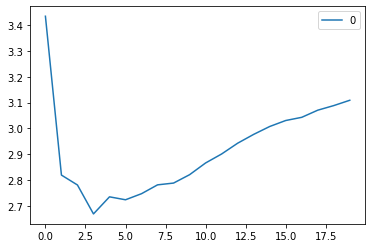

In [74]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [75]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 7}

In [96]:
predict = model.predict(x_test)

error = sqrt(mean_squared_error(y_test,predict)) #calculate rmse
print(error)


10.256379879152693


In [95]:
r2_score(y_test,predict)

-0.14723183153344843

In [ ]:
predict = model.predict(test)
submission['Item_Outlet_Sales'] = predict
submission.to_csv('submit_file.csv',index=False)

--------

## Decision Tree

In [81]:
# # from sklearn.preprocessing import MinMaxScaler

# x = df.drop(["winsorized_Life_Expectancy"] , axis = 1)
# y = df["winsorized_Life_Expectancy"]
# y = np.array(y).reshape(-1,1)


# # scaler_x = MinMaxScaler(feature_range = (0,1))
# # scaled_x = scaler_x.fit_transform(x)
# # scaled_x = pd.DataFrame(columns = x.columns , data = scaled_x)

In [80]:
# from sklearn.model_selection import train_test_split

# x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.1)

# y_train = np.reshape(y_train , (2644 , ))
# y_test = np.reshape(y_test , (294 , ))
# x_train.shape , x_test.shape , y_train.shape , y_test.shape

In [95]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
dtr = DecisionTreeRegressor()
dtr.fit(x_train , y_train)
dtr_predict = dtr.predict(x_test)
r2_score( y_test , dtr_predict)

0.9095097541066319

In [96]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(x_train,y_train)))

# dtm.fit(x_test,y_test)   
# print("R-Squaredon test dataset={}".format(dtm.score(x_test,y_test)))

R-Squared on train dataset=0.8551753184327044


In [97]:
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5, return_train_score = True)

grid_cv_dtm.fit(x_train,y_train)


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]},
             return_train_score=True)

In [98]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.9029645422146082
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [101]:
dtm = DecisionTreeRegressor( max_depth=8,
                           min_samples_split=10,
                           max_leaf_nodes=100,
                           min_samples_leaf= 20)

dtm.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(grid_cv_dtm.score(x_train,y_train)))

dtm.fit(x_test,y_test)   
print("R-Squaredon test dataset={}".format(grid_cv_dtm.score(x_test,y_test)))

R-Squared on train dataset=0.9361913047335761
R-Squaredon test dataset=0.9091262385648544


In [102]:
pd.DataFrame(grid_cv_dtm.cv_results_)\
  .sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
72,0.047442,0.002587,0.007395,0.000475,mse,8,100,20,10,"{'criterion': 'mse', 'max_depth': 8, 'max_leaf...",0.890431,0.880154,0.903031,0.922863,0.918343,0.902965,0.016185,1,0.934667,0.939140,0.935425,0.930059,0.924735,0.932805,0.004963
73,0.046648,0.002025,0.007451,0.000553,mse,8,100,20,20,"{'criterion': 'mse', 'max_depth': 8, 'max_leaf...",0.890431,0.880154,0.903031,0.922863,0.918343,0.902965,0.016185,1,0.934667,0.939140,0.935425,0.930059,0.924735,0.932805,0.004963
74,0.043461,0.000761,0.006816,0.000749,mse,8,100,20,40,"{'criterion': 'mse', 'max_depth': 8, 'max_leaf...",0.890431,0.880154,0.903031,0.922863,0.918343,0.902965,0.016185,1,0.934667,0.939140,0.935425,0.930059,0.924735,0.932805,0.004963
45,0.046521,0.006478,0.008403,0.001743,mse,6,100,20,10,"{'criterion': 'mse', 'max_depth': 6, 'max_leaf...",0.877163,0.877152,0.894361,0.920369,0.895480,0.892905,0.015868,4,0.923408,0.928677,0.919411,0.920348,0.907668,0.919902,0.006920
46,0.048426,0.004449,0.009009,0.001661,mse,6,100,20,20,"{'criterion': 'mse', 'max_depth': 6, 'max_leaf...",0.877163,0.877152,0.894361,0.920369,0.895480,0.892905,0.015868,4,0.923408,0.928677,0.919411,0.920348,0.907668,0.919902,0.006920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.236922,0.004606,0.007603,0.000492,mae,2,5,100,10,"{'criterion': 'mae', 'max_depth': 2, 'max_leaf...",0.664050,0.682897,0.698134,0.730542,0.717960,0.698717,0.023814,136,0.725397,0.719590,0.714600,0.705977,0.707666,0.714646,0.007265
88,0.240674,0.008029,0.007402,0.000491,mae,2,5,100,20,"{'criterion': 'mae', 'max_depth': 2, 'max_leaf...",0.664050,0.682897,0.698134,0.730542,0.717960,0.698717,0.023814,136,0.725397,0.719590,0.714600,0.705977,0.707666,0.714646,0.007265
89,0.273249,0.014442,0.009005,0.001549,mae,2,5,100,40,"{'criterion': 'mae', 'max_depth': 2, 'max_leaf...",0.664050,0.682897,0.698134,0.730542,0.717960,0.698717,0.023814,136,0.725397,0.719590,0.714600,0.705977,0.707666,0.714646,0.007265
92,0.296679,0.008075,0.007442,0.000464,mae,2,20,20,40,"{'criterion': 'mae', 'max_depth': 2, 'max_leaf...",0.664050,0.682897,0.698134,0.730542,0.717960,0.698717,0.023814,136,0.725397,0.719590,0.714600,0.705977,0.707666,0.714646,0.007265


## RandomForest

In [133]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train , y_train)

RandomForestRegressor()

In [143]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [134]:
rfr_predict = rfr.predict(x_test)

In [135]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('RMSE:', sqrt(mean_squared_error(y_test, rfr_predict)))

RMSE: 1.894912859217358


In [136]:
r2_score(y_test, rfr_predict)

0.960840108615654

In [177]:
#Nested GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid2 =[{'max_depth':[None,2,4,8,16,32,64,128],
               'min_samples_leaf':[1,5,10,20]}]
from sklearn.ensemble import RandomForestRegressor
model_rf = GridSearchCV(estimator = RandomForestRegressor(),
                     param_grid = param_grid2,
                     n_jobs = -1, verbose = True,
                     return_train_score = True)
model_rf.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   51.9s finished


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_depth': [None, 2, 4, 8, 16, 32, 64, 128],
                          'min_samples_leaf': [1, 5, 10, 20]}],
             return_train_score=True, verbose=True)

In [178]:
model_rf.best_params_

{'max_depth': 128, 'min_samples_leaf': 1}

In [179]:
pd.DataFrame(model_rf.cv_results_)\
  .sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
28,4.196833,0.157919,0.036004,0.002001,128,1,"{'max_depth': 128, 'min_samples_leaf': 1}",0.950448,0.949453,0.955435,0.958369,0.960130,0.954767,0.004221,1,0.993844,0.993974,0.993605,0.993541,0.993670,0.993727,0.000160
0,4.033183,0.044756,0.036602,0.008452,None,1,"{'max_depth': None, 'min_samples_leaf': 1}",0.950293,0.948818,0.955376,0.958977,0.960274,0.954748,0.004557,2,0.993658,0.994080,0.993543,0.993608,0.993505,0.993679,0.000207
20,4.122712,0.674578,0.034402,0.003720,32,1,"{'max_depth': 32, 'min_samples_leaf': 1}",0.950799,0.947867,0.955394,0.959305,0.959575,0.954588,0.004633,3,0.993545,0.993786,0.993639,0.993599,0.993761,0.993666,0.000093
24,4.202191,0.418229,0.039404,0.004364,64,1,"{'max_depth': 64, 'min_samples_leaf': 1}",0.949660,0.948641,0.954899,0.959274,0.959521,0.954399,0.004602,4,0.993623,0.994186,0.993692,0.994061,0.993482,0.993809,0.000269
16,4.098868,0.251053,0.046604,0.006184,16,1,"{'max_depth': 16, 'min_samples_leaf': 1}",0.949933,0.950041,0.955010,0.958806,0.957626,0.954283,0.003717,5,0.993048,0.993660,0.993466,0.993059,0.992646,0.993176,0.000355
1,2.782125,0.233797,0.026803,0.002315,None,5,"{'max_depth': None, 'min_samples_leaf': 5}",0.941509,0.941612,0.948503,0.953187,0.955426,0.948047,0.005749,6,0.977819,0.979329,0.977849,0.977462,0.977132,0.977918,0.000753
29,2.746885,0.213112,0.029201,0.003655,128,5,"{'max_depth': 128, 'min_samples_leaf': 5}",0.941380,0.942875,0.947074,0.953847,0.954516,0.947938,0.005433,7,0.977484,0.979617,0.977990,0.978107,0.977473,0.978134,0.000785
21,3.158868,0.440972,0.030915,0.004603,32,5,"{'max_depth': 32, 'min_samples_leaf': 5}",0.940652,0.941782,0.946644,0.954073,0.955864,0.947803,0.006213,8,0.977491,0.979286,0.977906,0.978264,0.977410,0.978071,0.000680
25,2.734860,0.179115,0.030803,0.005706,64,5,"{'max_depth': 64, 'min_samples_leaf': 5}",0.938060,0.942391,0.947678,0.955379,0.954250,0.947552,0.006676,9,0.977777,0.979677,0.977953,0.977853,0.977427,0.978137,0.000790
17,3.041699,0.254475,0.028602,0.001357,16,5,"{'max_depth': 16, 'min_samples_leaf': 5}",0.937938,0.944246,0.945938,0.953338,0.954974,0.947287,0.006232,10,0.977201,0.979724,0.978343,0.978124,0.977381,0.978154,0.000895


In [184]:
m = RandomForestRegressor(max_depth= 128, min_samples_leaf = 1)
m.fit(x_train, y_train)

RandomForestRegressor(max_depth=128)

In [185]:
rfr_predict = m.predict(x_test)

In [186]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('RMSE:', sqrt(mean_squared_error(y_test, rfr_predict)))

RMSE: 1.921342090544127


In [187]:
r2_score(y_test, rfr_predict)

0.9597401283204765

In [122]:
rf = RandomForestRegressor(bootstrap=False, max_depth=50, max_features=10,
                      n_estimators=25, n_jobs=-1)
rf.fit(x_train , y_train)
rf_predict = rf.predict(x_test)
r2_score( y_test , rf_predict)

0.9469352252398838

In [123]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [124]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.7816567154216196
Best Hyperparameters::
{'max_depth': 6, 'n_estimators': 1000}


In [160]:
m = RandomForestRegressor(max_features='sqrt', n_jobs=-1)
m.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', n_jobs=-1)

In [115]:
pd.DataFrame(grid_cv_dtm.cv_results_)\
  .sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
15,2.277328,0.109472,0.232669,0.035389,6,1000,"{'max_depth': 6, 'n_estimators': 1000}",0.791069,0.771117,0.780635,0.775552,0.789911,0.781657,0.007825,1,0.809143,0.809609,0.804376,0.803302,0.799997,0.805285,0.003642
13,0.288552,0.005159,0.036504,0.004506,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.794694,0.750116,0.779070,0.774093,0.790222,0.777639,0.015629,2,0.805269,0.785997,0.803194,0.800793,0.801503,0.799351,0.006853
14,0.464316,0.051754,0.046905,0.009676,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.754680,0.768247,0.775397,0.777575,0.782429,0.771666,0.009642,3,0.776031,0.802080,0.798858,0.805851,0.794528,0.795470,0.010409
12,0.177845,0.006077,0.017971,0.003956,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.754936,0.733481,0.713131,0.772359,0.790595,0.752901,0.027431,4,0.776504,0.777313,0.739913,0.804331,0.787039,0.777020,0.021088
10,0.440005,0.018975,0.052121,0.004710,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.739333,0.747253,0.751308,0.727259,0.768017,0.746634,0.013477,5,0.751963,0.783336,0.771699,0.754641,0.777608,0.767849,0.012464
11,2.091978,0.068523,0.245138,0.024453,5,1000,"{'max_depth': 5, 'n_estimators': 1000}",0.747692,0.734711,0.739810,0.718382,0.752010,0.738521,0.011729,6,0.761652,0.768978,0.761367,0.748050,0.759554,0.759920,0.006755
8,0.178245,0.005339,0.020811,0.004556,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.710258,0.647493,0.793630,0.729208,0.740282,0.724174,0.047292,7,0.725061,0.686769,0.807893,0.755528,0.743479,0.743746,0.039621
9,0.290526,0.011631,0.022564,0.002491,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.699590,0.699672,0.737214,0.713795,0.721602,0.714375,0.014205,8,0.717074,0.733740,0.756140,0.734572,0.732829,0.734871,0.012447
7,1.950490,0.060742,0.268058,0.007757,4,1000,"{'max_depth': 4, 'n_estimators': 1000}",0.680634,0.665311,0.674882,0.666189,0.677869,0.672977,0.006181,9,0.691260,0.695911,0.694206,0.696905,0.683781,0.692412,0.004722
6,0.414113,0.023945,0.047886,0.003217,4,100,"{'max_depth': 4, 'n_estimators': 100}",0.658702,0.688136,0.675194,0.663428,0.679174,0.672927,0.010659,10,0.671890,0.717860,0.692748,0.692090,0.680833,0.691084,0.015455


In [101]:
import xgboost as xgb
xboost = xgb.XGBRegressor(n_estimators = 200)
xboost.fit(x_train, y_train)
xboost_predict = xboost.predict(x_test)
r2_score(y_test , xboost_predict)

0.9584234182738908

------

In [122]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(x_train, y_train)
#fit regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [123]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(x_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 1.87
RMSE of random forest = 0.69
RMSE of decision tree = 0.00


In [124]:
for i, model in models:
    # Make predictions on train data
    predictions = model.predict(x_train)
    # Performance metrics
    errors = abs(predictions - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_train))
    # Calculate and display accuracy
    accuracy = 100 - mape    
    #print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')

Accuracy of lin_reg= 98.17 %
Accuracy of random forest= 99.34 %
Accuracy of decision tree= 100.00 %


In [125]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [126]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=50, max_features=10,
                      n_estimators=25, n_jobs=-1)

In [127]:
grid_best= grid_search_forest.best_estimator_.predict(x_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 99.99 %


In [128]:
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 0.02


In [ ]:
list(zip(feature_cols, lm2.coef_))